# Project 1: Customer Database
**This is the first of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-10-13, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **For each question you may use as many cells for your solution as you like**
- **You should document your solution and explain the choices you've made (for example by using multiple cells and use Markdown to assist the reader of the notebook)**
- **You should not remove the problem statements, and you should not modify the structure of the notebook**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**
- **You will be assessed according to correctness and readability of your code, choice of solution, choice of tools and libraries, and documentation of your solution**

## Introduction
Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the companys historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doens't exist, and the only record of sales transactions is kept by John from finance in an Excel spreadsheet. So you've emailed John asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from John, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.

## Part 1: Cleaning the data
John has emailed you the following link to the CSV dump you requested.

- [transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
- Explain what the data is
- Clean it to prepare it for inserting into a database and doing data analysis 

---
### Solution

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv')

In [107]:
df.head()

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55


In [108]:
df.describe()

,part,company,country,city,price,date
count,20558,20568,18397,20535,20567,20568
unique,100,35,13,30,19214,20552
top,17156-617,Thoughtmix,Portugal,Amadora\t,-,10/04/2017
freq,300,2795,7383,2787,5,7


In [109]:
df.nunique()

part         100
company       35
country       13
city          30
price      19214
date       20552
dtype: int64

In [110]:
len(df)

20568

### Explain what the Data is

---

As stated before, the data contains transaction details from different companies. The data includes the company name, the city and country where the transaction took place, what the value of that transaction was, and the date of the transaction. 

**part** seems to describe the name of the product purchased. We have 100 unique *part* values in the dataframe, as can be seen above. 

**company** holds information about the company that the transaction is made with. Within the data, we currently have 35 different companies. 

The data currently holds transaction information for 13 countries and 30 cities in the columns **country** and **city**. 

Each transaction has a **price** and a **date** attached to it, detailing the amount of the transaction and the time it took place. 

As we can see above, we have 20,568 different transactions within the data, before cleaning has begun.

---



### Clean it to prepare it for inserting into a database and doing data analysis

---

**Lets start by looking at missing data**

In [111]:
for column in df.columns:
    if(df[column].isnull().values.any()):
        print("The column {} has null values.".format(column))

The column part has null values.
The column country has null values.
The column city has null values.
The column price has null values.


We can visualize this even better by plotting a heatmap of the missing values:

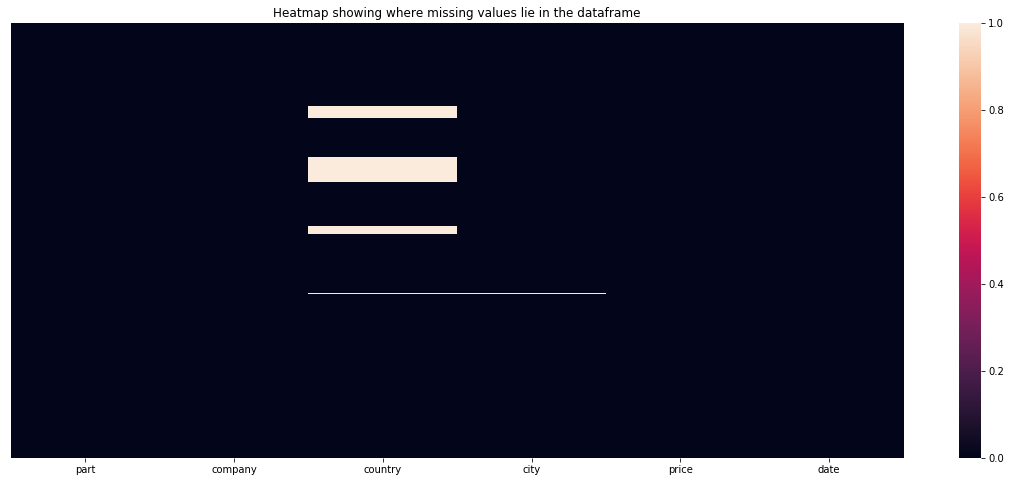

In [112]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Heatmap showing where missing values lie in the dataframe")
plt.show()

As we can see from this heatmap, the column 'Country' has the most missing values, but we also have missing values in 'City'. Lets go through the columns that have missing data and clean them. 

**Part column:**

We have 10 rows where the **part** value is missing.

In [113]:
df[df['part'].isnull()]

,part,company,country,city,price,date
14916,NaN,Yozio,Greece,Patras,518.38€,2018-02-17 21:43:43
14917,NaN,Brainsphere,Portugal,Braga,957.24€,2018-02-17 22:12:24
14918,NaN,Lajo,Greece,Thessaloniki,966.06€,2018-02-17 22:54:49
14919,NaN,Roodel,Portugal,Aranhas,873.65€,2018-02-17 23:36:52
17524,NaN,Yozio,Greece,Patras,627.32€,2018-07-12 03:28:46
17525,NaN,Thoughtmix,Portugal,Amadora\t,825.8€,2018-07-12 05:34:07
17526,NaN,Gabcube,Portugal,Almada,188.31€,2018-07-12 06:49:44
17527,NaN,Buzzbean,Germany,Düsseldorf,429.67€,2018-07-12 07:03:50
17528,NaN,Zoonder,United States,Boston,$521.72,2018-07-12 08:38:56
17529,NaN,Twitterbeat,France,Annecy,1031.46€,2018-07-12 09:48:17


In [114]:
len(df[df['part'].isnull()])

10

What we could do is look at what these companies are buying and see if we can conclude the part that are missing from that information

In [115]:
df[df['company'].isin(df[df['part'].isnull()]['company'].unique())].groupby(['company','part']).count()

country  city  price  date
company     part                                  
Brainsphere 0185-0373        10     9     10    10
            0228-2167        16    16     16    16
            0268-1128         8     9      9     9
            0268-1401        12    12     12    12
            0268-1604         7     7      7     7
            0268-6107        13    14     14    14
            0603-6134        18    18     18    18
            0615-7679        11    14     14    14
            0699-7041        15    18     18    18
            10237-832        18    20     20    20
            10267-2529       12    13     13    13
            10578-049         9    11     11    11
            13537-259        19    21     21    21
            13537-468         7     8      8     8
            16477-306         5     5      5     5
            16590-177        14    15     15    15
            16714-295        16    17     17    17
            16729-167        13    14     14    14
            17156-617        11    14     14    14
            21695-267        11    12     12    12
            21695-931         9    12     12    12
            24286-1562       13    13     13    13
            24385-268        15    15     15    15
            35356-325        12    14     14    14
            36800-952         9     9      9     9
            36987-1697       13    15     15    15
            37205-951        10    10     10    10
            37205-992        14    16     16    16
            41163-428        13    14     14    14
            41167-0843        9    11     11    11
...                         ...   ...    ...   ...
Zoonder     54973-9150        4     4      4     4
            55154-5057        5     6      6     6
            55289-164         5     5      5     5
            55566-2100        6     6      6     6
            55700-014         3     3      3     3
            55856-0003        4     5      5     5
            58118-5060        4     4      4     4
            58596-001         4     5      5     5
            58668-4281        4     5      5     5
            59779-601         3     5      5     5
            60505-2867        8     8      8     8
            62011-0219        4     5      5     5
            62670-4404        4     4      4     4
            62742-4030        6     6      6     6
            62756-707         4     4      4     4
            65044-3014        2     3      3     3
            67046-030         2     2      2     2
            67544-356         4     4      4     4
            68084-172         6     7      7     7
            68084-595         1     1      1     1
            68180-121         4     5      5     5
            68233-011         5     5      5     5
            68462-565         1     1      1     1
            68752-024         3     3      3     3
            70253-307         1     3      3     3
            76117-001         2     2      2     2
            76314-002         3     5      5     5
            76335-006         0     1      1     1
            76454-100         5     5      5     5
            98132-889         2     2      2     2

[876 rows x 4 columns]

**We can see from this dataframe that knowing a company does not mean we know what product they were buying.**

We can conclude that the null values are those that are not numeric, so we can clean the data by removing these values. Because the part column is a *categorical* column we cannot set these missing values to a mere average of the column. Another way we could deal with this issue is set the NaN value to be the most common value for a part, but we believe the best way to deal with this issue is to remove the rows that have a missing value for `part`. 

In [116]:
df.dropna(axis=0,inplace=True,subset=['part'])

**Country and city columns:**

In [117]:
len(df[df['country'].isnull()])

2171

For this column, we have quite a lot of data. We can be clever and check if the value for City is not null, and if so, we should know the Country.

However, if we investigate the data more carefully, we can see that we know which country and city the transaction takes place if we know the company. Thus, we can fill in the missing values. 

In [118]:
df.groupby(['company','country']).count()

part  city  price  date
company       country                                
 -            United States      1     1      1     1
 a            United States      1     1      1     1
Avaveo        France           182   182    182   182
Brainsphere   Portuga            1     1      1     1
              Portugal        1116  1114   1116  1116
Bubblemix     Japan             47    47     47    47
Buzzbean      Germany         1124  1124   1124  1124
              Tyskland           1     1      1     1
Chatterbridge Spain           1425  1425   1425  1425
Eimbee        France           452   452    452   452
Flipstorm     France           332   332    332   332
              Greece           713   713    713   713
Gabcube       Portugal         323   323    323   323
Gabtune       France            24    24     24    24
Gevee         France            35    35     35    35
Innojam       Netherlands       40    40     40    40
Kanoodle      Japan            112   112    112   112
Laj0          Greece             1     1      1     1
Lajo          Greece           200   200    200   200
Ntags         Portuga            1     1      1     1
              Portugal        1351  1351   1351  1351
Ntagz         Portugal           1     1      1     1
Realpoint     Portugal         143   143    143   143
Rhycero       France           180   180    180   180
Riffpath      Greece           130   130    130   130
Roodel        Portugal         553   553    552   553
Shufflebeat   Portugal        1383  1382   1383  1383
Tagtune       Switzerland       11    11     11    11
Teklist       Netherlands      387   387    387   387
Thoughtmix    Portuga            3     3      3     3
              Portugal        2508  2508   2508  2508
Thoughtmixz   Portugal           1     1      1     1
Twitterbeat   France          2037  2037   2037  2037
Voomm         France           220   220    220   220
Wordify       United States    856   856    856   856
Yozio         Greece           583   583    583   583
Zoonder       US                 1     1      1     1
              United States    396   396    396   396
Zooxo         United Kingdom  1509  1509   1509  1509
Zooxo.        United Kingdom     2     2      2     2
aa            United States      1     1      1     1

What we see here is that some companies have two names in the dataframe, i.e. Zooxo | Zooxo. , Thoughtmix | Thoughtmix etc. We can also see that the names of some countries are mixed up. We have some occurances of US and some occurances of United States. The string `Portuga` also appears in one place. `Tyskland` appears instead of Germany, etc.  

 We need to take care of this before taking care of the missing values for Countries and Cities

In [119]:
df[df['country'] == 'Tyskland']

,part,company,country,city,price,date
3543,55856-0003,Buzzbean,Tyskland,Düsseldorf,641.6€,2016-06-10 12:02:48


In [120]:
# Correcting countries
df.replace(to_replace='Tyskland',value='Germany',inplace=True)
df.replace(to_replace='Portuga',value='Portugal',inplace=True)
df.replace(to_replace='US',value='United States',inplace=True)

In [121]:
# Correcing company names
df.replace(to_replace='Laj0',value='Lajo',inplace=True)
df.replace(to_replace='Ntagz',value='Ntags',inplace=True)
df.replace(to_replace='Thoughtmixz',value='Thoughtmix',inplace=True)
df.replace(to_replace='Zooxo.',value='Zooxo',inplace=True)

In [122]:
df.groupby(['company','country']).count()

,,part,city,price,date
company,country,,,,
-,United States,1,1,1,1
a,United States,1,1,1,1
Avaveo,France,182,182,182,182
Brainsphere,Portugal,1117,1115,1117,1117
Bubblemix,Japan,47,47,47,47
Buzzbean,Germany,1125,1125,1125,1125
Chatterbridge,Spain,1425,1425,1425,1425
Eimbee,France,452,452,452,452
Flipstorm,France,332,332,332,332


After the cleaning of names, we can see that there is only one company that doesn't serve just one country, and that is **Flipstorm.** Below we can see that most companys correspond to one country and one city, for Brainsphere, but we only have 1 out of 1115 total transactions from them belonging to Monção, and Thoughtmix, which also has just one transaction not corresponding to their most popular city (Amadora/t). 

In [123]:
df.groupby(['company','country','city']).count()

part  price  date
company       country        city                           
 -            United States  Boston           1      1     1
 a            United States  New York         1      1     1
Avaveo        France         Nice           182    182   182
Brainsphere   Portugal       Braga         1114   1114  1114
                             Monção           1      1     1
Bubblemix     Japan          Asaka           47     47    47
Buzzbean      Germany        Düsseldorf    1125   1125  1125
Chatterbridge Spain          Barcelona     1425   1425  1425
Eimbee        France         Amiens         452    452   452
Flipstorm     France         Nanterre       332    332   332
              Greece         Athens         713    713   713
Gabcube       Portugal       Almada         323    323   323
Gabtune       France         Lyon            24     24    24
Gevee         France         Champagnole     35     35    35
Innojam       Netherlands    Amsterdam       40     40    40
Kanoodle      Japan          Niihama        112    112   112
Lajo          Greece         Thessaloniki   201    201   201
Ntags         Portugal       Lisbon        1353   1353  1353
Realpoint     Portugal       Lisbon         143    143   143
Rhycero       France         Arcueil        180    180   180
Riffpath      Greece         Heraklion      130    130   130
Roodel        Portugal       Aranhas        553    552   553
Shufflebeat   Portugal       Porto         1382   1382  1382
Tagtune       Switzerland    Zürich          11     11    11
Teklist       Netherlands    Arnhem         387    387   387
Thoughtmix    Portugal       Amadora\t     2511   2511  2511
                             Vila Fria        1      1     1
Twitterbeat   France         Annecy        2037   2037  2037
Voomm         France         Paris          220    220   220
Wordify       United States  New York       856    856   856
Yozio         Greece         Patras         583    583   583
Zoonder       United States  Boston         397    397   397
Zooxo         United Kingdom London        1511   1511  1511
aa            United States  New York         1      1     1

In [124]:
df.replace(to_replace='Amadora\t',value='Amadora',inplace=True)

We can create a dictionary with the values of the companies and the corresponding possibilities of the Countries and Cities. From that we can create a function that looks up the value of a company in the dataframe and checks which country and city should be filled in, if those values are null. 

In [125]:
comp_country = df.groupby(['company','country']).count().reset_index().drop(['part','city','price','date'],axis=1)

In [126]:
comp_country.sample(5)

,company,country
23,Teklist,Netherlands
11,Gabtune,France
1,a,United States
24,Thoughtmix,Portugal
2,Avaveo,France


In [127]:
comp_country_dict = {}
for index, row in comp_country.iterrows():
    if(row['company'] == 'Flipstorm'): # We cant add flipstorm as that company is the only company to serve 2 countries
        continue
    else:
        comp_country_dict[row['company']] = row['country']

Now we can filter in the correct countries and cities according to which company the transaction belongs to. 

In [128]:
def get_country(cols):
    
    company = cols[0]
    country = cols[1]
    
    if(company=='Flipstorm'):
        # We cant deduct which country this is from
        return country
    else:
        return comp_country_dict[company]

In [129]:
df['country'] = df[['company','country']].apply(get_country,axis=1)

In [130]:
df.groupby(['company','country']).count()

,,part,city,price,date
company,country,,,,
-,United States,1,1,1,1
a,United States,1,1,1,1
Avaveo,France,212,212,212,212
Brainsphere,Portugal,1241,1237,1241,1241
Bubblemix,Japan,54,54,54,54
Buzzbean,Germany,1253,1253,1253,1253
Chatterbridge,Spain,1589,1589,1589,1589
Eimbee,France,498,498,498,498
Flipstorm,France,332,332,332,332


Now we can deal with the occurance when we have Flipstorm is the company. We can see from the cell below that each time a transaction comes from the company Flipstorm, we always have a city present. 

This means that where the country is null and the company is Flipstorm, we can fill in the country depending on which city the transaction comes from. 

In [131]:
df[(df['company'] == 'Flipstorm') & (df['city'].isnull())]

,part,company,country,city,price,date


As we can see, there are only two possible cities for the company Flipstorm to register a transaction, namely Athens, Greece and Nanterre, France

In [132]:
df[df['company']=='Flipstorm'].groupby(['country','city']).count()

,,part,company,price,date
country,city,,,,
France,Nanterre,332,332,332,332
Greece,Athens,713,713,713,713


In [133]:
def get_flipstorm_country(cols):
    company = cols[0]
    country = cols[1]
    city = cols[2]
    if(city == "Nanterre"): # Here we have Flipstorm, we have to look at the city.
        return "France"
    elif(city == "Athens"):
        return "Greece"
    else:
        return country # We don't need to change the country value if we arent in Nanterre or Athens.

In [134]:
df['country'] = df[['company','country','city']].apply(get_flipstorm_country, axis=1)

Now we can look at the missing values again:

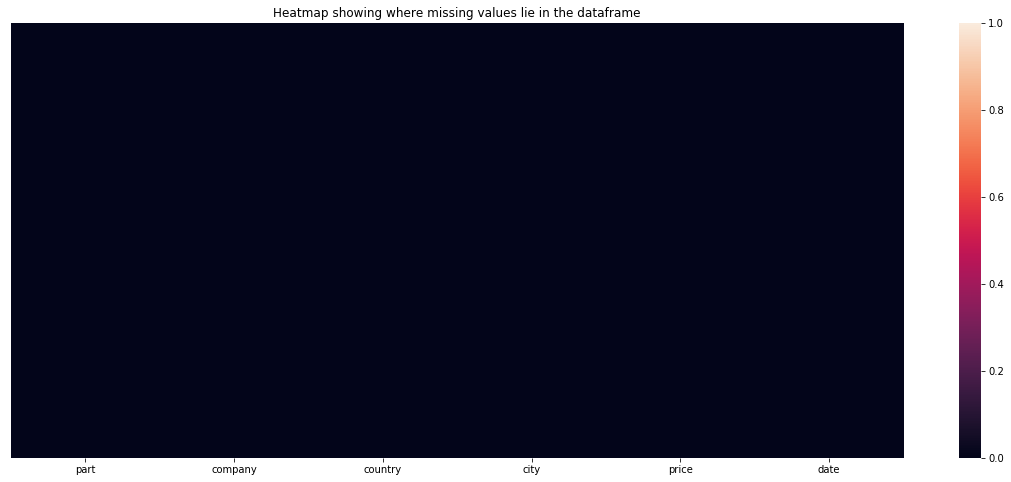

In [135]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Heatmap showing where missing values lie in the dataframe")
plt.show()

We have taken care of the missing values in Country and City. 

***Disclaimer:*** We took care of the missing values this way because the `company` column did seem to indicate in which country and city we were in. We could have made the decision to get rid of the data that had null values but I feel we made the right decision given how much data it was that was missing. 

By carefully investigating what the data was telling us, we figured out that it seemed logical to deduce that a company can determine the location of the transaction. 

We can now see that the company, country and city columns make more sense, i.e. no misspelled company, country or city names etc. 

In [136]:
df.groupby(['company','country','city']).count()

part  price  date
company       country        city                           
 -            United States  Boston           1      1     1
 a            United States  New York         1      1     1
Avaveo        France         Nice           212    212   212
Brainsphere   Portugal       Braga         1236   1236  1236
                             Monção           1      1     1
Bubblemix     Japan          Asaka           54     54    54
Buzzbean      Germany        Düsseldorf    1253   1253  1253
Chatterbridge Spain          Barcelona     1589   1589  1589
Eimbee        France         Amiens         498    498   498
Flipstorm     France         Nanterre       381    381   381
              Greece         Athens         812    812   812
Gabcube       Portugal       Almada         356    356   356
Gabtune       France         Lyon            27     27    27
Gevee         France         Champagnole     36     36    36
Innojam       Netherlands    Amsterdam       44     44    44
Kanoodle      Japan          Niihama        126    126   126
Lajo          Greece         Thessaloniki   220    220   220
Ntags         Portugal       Lisbon        1509   1509  1509
Realpoint     Portugal       Lisbon         158    158   158
Rhycero       France         Arcueil        204    204   204
Riffpath      Greece         Heraklion      151    151   151
Roodel        Portugal       Aranhas        626    625   626
Shufflebeat   Portugal       Porto         1550   1550  1550
Tagtune       Switzerland    Zürich          12     12    12
Teklist       Netherlands    Arnhem         426    426   426
Thoughtmix    Portugal       Amadora       2786   2786  2786
                             Vila Fria        1      1     1
Twitterbeat   France         Annecy        2266   2266  2266
Voomm         France         Paris          250    250   250
Wordify       United States  New York       966    966   966
Yozio         Greece         Patras         651    651   651
Zoonder       United States  Boston         452    452   452
Zooxo         United Kingdom London        1669   1669  1669
aa            United States  New York         1      1     1

Cleaning the data by removing the transactions where the company names are `"-"`, `"aa"` or `"a"` may seem feasible and logical, as these are only 3 out of around 20,000 transactions and they do not seem to represent believable companies. 

In [137]:
df['company'].unique()

array(['Chatterbridge', 'Lajo', 'Flipstorm', 'Twitterbeat', 'Voomm',
       'Buzzbean', 'Zooxo', 'Brainsphere', 'Thoughtmix', 'Wordify',
       'Teklist', 'Avaveo', 'Ntags', 'Innojam', 'Shufflebeat', 'Zoonder',
       'Kanoodle', 'Gabcube', 'Roodel', 'Riffpath', 'Eimbee', 'Yozio',
       'Rhycero', 'Realpoint', 'Gabtune', 'Bubblemix', 'Gevee', 'Tagtune',
       ' -', ' a', 'aa'], dtype=object)

In [138]:
df = df[df['company'] != ' -']
df = df[df['company'] != ' a']
df = df[df['company'] != 'aa']

In [139]:
df.groupby(['company','country','city']).count()

part  price  date
company       country        city                           
Avaveo        France         Nice           212    212   212
Brainsphere   Portugal       Braga         1236   1236  1236
                             Monção           1      1     1
Bubblemix     Japan          Asaka           54     54    54
Buzzbean      Germany        Düsseldorf    1253   1253  1253
Chatterbridge Spain          Barcelona     1589   1589  1589
Eimbee        France         Amiens         498    498   498
Flipstorm     France         Nanterre       381    381   381
              Greece         Athens         812    812   812
Gabcube       Portugal       Almada         356    356   356
Gabtune       France         Lyon            27     27    27
Gevee         France         Champagnole     36     36    36
Innojam       Netherlands    Amsterdam       44     44    44
Kanoodle      Japan          Niihama        126    126   126
Lajo          Greece         Thessaloniki   220    220   220
Ntags         Portugal       Lisbon        1509   1509  1509
Realpoint     Portugal       Lisbon         158    158   158
Rhycero       France         Arcueil        204    204   204
Riffpath      Greece         Heraklion      151    151   151
Roodel        Portugal       Aranhas        626    625   626
Shufflebeat   Portugal       Porto         1550   1550  1550
Tagtune       Switzerland    Zürich          12     12    12
Teklist       Netherlands    Arnhem         426    426   426
Thoughtmix    Portugal       Amadora       2786   2786  2786
                             Vila Fria        1      1     1
Twitterbeat   France         Annecy        2266   2266  2266
Voomm         France         Paris          250    250   250
Wordify       United States  New York       966    966   966
Yozio         Greece         Patras         651    651   651
Zoonder       United States  Boston         452    452   452
Zooxo         United Kingdom London        1669   1669  1669

---

**Price column**

In [140]:
df[df['price'].isna()]

,part,company,country,city,price,date
11015,49967-724,Roodel,Portugal,Aranhas,NaN,2017-07-11 08:00:56


In [141]:
df.sample(10)

,part,company,country,city,price,date
13941,51531-9500,Avaveo,France,Nice,941.62€,2017-12-22 11:19:44
2931,65044-3014,Brainsphere,Portugal,Braga,902.26€,2016-05-09 18:10:31
18834,48951-4042,Roodel,Portugal,Aranhas,180.44€,2018-09-26 23:40:28
14532,51531-9500,Thoughtmix,Portugal,Amadora,1075.34€,2018-01-25 15:07:28
9870,59779-028,Roodel,Portugal,Aranhas,294.54€,2017-05-07 16:36:00
12692,48951-4042,Riffpath,Greece,Heraklion,221.6€,2017-10-12 12:35:01
2652,41163-428,Twitterbeat,France,Annecy,129.78€,2016-04-26 17:08:10
2683,54092-515,Teklist,Netherlands,Arnhem,775.6€,2016-04-28 00:36:35
5679,49520-501,Thoughtmix,Portugal,Amadora,913.34€,2016-09-25 18:31:08
18163,55289-164,Yozio,Greece,Patras,178.49€,2018-08-18 11:10:11


We can see that there exists a single NaN entry in the price column. 

We can set this value to be the average price of the part which the observation is about. To do this, we must first take care of the inconsistencies that exist within this column, relating to the name and how the currency is recorded.

First, we can see that the price column contains the values in a string, and it somtimes contains the *Currency symbol* for the value. We want to change them into floating numbers, but we need to keep track of what currency they are denoting. 

We can use *regular expressions* to get rid of whatever is in the string that is not a number or a decimal point. We can then place the currency string into a new column to add to the data and inform about what currency it is being denoted. This way we can have a more clear overview of the datafield *price* as floating numbers, and have a view of the currency denoted as a string. 


We can also see that we sometimes have **negative** transactions. This has to be taken care of as well. It would be best to create a seperate column denoting the type of transaction, i.e. if it is an addition or subtraction. 

Some price amounts have no dedicated currency in front of them, so we have to take care of that as well.

We can also see that we have some prices that are not registered (see below).

We have to take care of the `void`, `nan` and `na` occurances in the same manner as we are going to take care of the `NaN`.

Of course, we could have set the values as the average over all prices, but as the prices are not of the same currency and they would have to be cleaned first (with the missing values still in place, making it harder) and there are so few occurances of these `void`, `nan`, `na` and `-`values, we decided to remove these rows. 

In [142]:
def type_of_transaction(price):
    price = str(price)
    
    if(price not in ['void','-','na','nan']):
        if(price[0] == '-'):
            return 'negative'

        else:
            return 'positive'
    else:
        return 'No type'

In [143]:
def get_currency(price):
    price = str(price)
    
    if(price not in ['void','-','na','nan']):
        if(price[0] == '-'):

            #Remove the - symbol
            price = price[1:]

            #Check where the currency symbol is
            if(str(price[0]).isdigit()):

                #The currency symbol is at the back
                currency = price[-1]
                return currency
            else:
                #The currency symbol is at the front
                currency = price[0]
                return currency
        else:
            if(str(price[0]).isdigit()):

                #The currency symbol could be at the back
                if(str(price[-1]).isdigit()):
                    #There is no currency symbol
                    currency = 'No currency'
                else:
                    #Here, the last symbol is the currency
                    currency = price[-1]
                return currency
            else:

                #The currency symbol is at the front
                currency = price[0]
                return currency
    else:
        return "No currency"

In [144]:
def get_price_amount(price):
    price = str(price)
    
    if(price not in ['void','-','na','nan']):
        if(price[0] == '-'):

            #Remove the - symbol
            price = price[1:]

            #Check where the currency symbol is
            if(str(price[0]).isdigit()):

                #The currency symbol is at the back
                currency = price[-1]
                price = price.replace(currency, "")
                return -float(price)
            else:

                #The currency symbol is at the front
                currency = price[0]
                price = price.replace(currency, "")
                return -float(price)


        else:
            if(str(price[0]).isdigit()):

                #The currency symbol could be at the back
                if(str(price[-1]).isdigit()):
                    #There is no currency
                    return float(price)
                else:
                    #Here, the last symbol is the currency, we have to remove it
                    currency = price[-1]
                    price = price.replace(currency, "")
                    return float(price)
            else:

                #The currency symbol is at the front
                currency = price[0]
                price = price.replace(currency, "")
                return float(price)
    else:
        return np.nan #Replace the occurances of 'void','na' and 'nan' with NaN

In [145]:
df['amount'] = df['price'].apply(get_price_amount) #Obtain the amount from the price string

In [146]:
df.sample(10)

,part,company,country,city,price,date,amount
741,68084-172,Flipstorm,Greece,Athens,291.59€,2016-02-02 07:07:19,291.59
8785,51523-002,Shufflebeat,Portugal,Porto,1593.09€,2017-03-09 00:39:53,1593.09
3138,0185-0373,Brainsphere,Portugal,NaN,1012.8€,2016-05-20 10:42:10,1012.80
20564,49999-737,Thoughtmix,Portugal,Amadora,828.37€,2018-12-31 21:24:17,828.37
4449,68180-121,Twitterbeat,France,Annecy,973.29€,2016-07-27 20:58:15,973.29
14279,49967-724,Thoughtmix,Portugal,Amadora,383.8€,2018-01-11 08:14:12,383.80
11845,10267-2529,Ntags,Portugal,Lisbon,433.29€,2017-08-25 16:36:46,433.29
861,68084-595,Twitterbeat,France,Annecy,134.16€,2016-02-07 21:32:49,134.16
11516,76454-100,Twitterbeat,France,Annecy,102.94€,2017-08-07 05:02:22,102.94
11595,60505-2867,Ntags,Portugal,Lisbon,183.82€,2017-08-11 08:39:58,183.82


In [147]:
df['currency'] = df['price'].apply(get_currency) #Obtain the currency from the price string

In [148]:
df.sample(10)

,part,company,country,city,price,date,amount,currency
9013,16590-177,Brainsphere,Portugal,Braga,377.47€,2017-03-22 07:07:38,377.47,€
6496,0615-7679,Twitterbeat,France,Annecy,295.17€,2016-11-06 15:16:15,295.17,€
17154,16590-177,Twitterbeat,France,Annecy,744.02€,2018-06-23 02:21:30,744.02,€
766,24286-1562,Twitterbeat,France,Annecy,279.51€,2016-02-03 20:02:31,279.51,€
12932,13537-259,Rhycero,France,Arcueil,767.75€,2017-10-26 23:12:41,767.75,€
13954,55154-5057,Shufflebeat,Portugal,Porto,1285.8€,2017-12-23 06:39:41,1285.80,€
9260,13537-259,Thoughtmix,Portugal,Amadora,787.36€,2017-04-06 02:48:05,787.36,€
630,50458-560,Flipstorm,Greece,Athens,1286.07€,2016-01-28 00:15:43,1286.07,€
13158,43419-018,Roodel,Portugal,Aranhas,164.1€,2017-11-08 08:30:34,164.10,€
10077,52125-136,Thoughtmix,Portugal,Amadora,720.75€,2017-05-19 19:36:13,720.75,€


In [149]:
df['type'] = df['price'].apply(type_of_transaction) #Obtain the type of transaction

In [150]:
df.sample(20)

,part,company,country,city,price,date,amount,currency,type
3218,51531-9500,Thoughtmix,Portugal,Amadora,1017.1€,2016-05-24 13:08:20,1017.10,€,positive
10626,67544-356,Innojam,Netherlands,Amsterdam,618.39€,2017-06-18 22:04:12,618.39,€,positive
18190,68462-565,Thoughtmix,Portugal,Amadora,698.81€,2018-08-19 22:15:03,698.81,€,positive
10753,13537-259,Zooxo,United Kingdom,London,£643.02,2017-06-26 05:15:41,643.02,£,positive
1295,49349-842,Zooxo,United Kingdom,London,£371.81,2016-02-25 11:39:15,371.81,£,positive
12099,49738-105,Teklist,Netherlands,Arnhem,502.25€,2017-09-08 19:48:25,502.25,€,positive
7740,54092-515,Wordify,United States,New York,$829.71,2017-01-10 15:36:48,829.71,$,positive
10204,63629-2733,Flipstorm,Greece,Athens,174.97€,2017-05-26 02:58:06,174.97,€,positive
6806,98132-889,Lajo,Greece,Thessaloniki,198.09€,2016-11-22 05:04:18,198.09,€,positive
12112,16590-177,Zooxo,United Kingdom,London,£339.57,2017-09-09 11:49:58,339.57,£,positive


We can now drop the price column and look a little closer at the missing values for the amount. 

In [151]:
df.drop('price',axis=1,inplace=True)

We now have some other null/Nan values to deal with: 

In [152]:
df[df['amount'].isnull()]

,part,company,country,city,date,amount,currency,type
8683,49349-820,Chatterbridge,Spain,Barcelona,2017-03-03 15:24:39,NaN,No currency,No type
8684,10267-2529,Thoughtmix,Portugal,Amadora,2017-03-03 18:07:56,NaN,No currency,No type
8685,13537-259,Ntags,Portugal,Lisbon,2017-03-03 19:08:54,NaN,No currency,No type
8934,68084-172,Twitterbeat,France,Annecy,2017-03-18 01:53:38,NaN,No currency,No type
10328,54868-0823,Chatterbridge,Spain,Barcelona,2017-06-02 06:49:09,NaN,No currency,No type
10329,41163-428,Avaveo,France,Nice,2017-06-02 07:04:35,NaN,No currency,No type
10330,52959-433,Buzzbean,Germany,Düsseldorf,2017-06-02 09:04:46,NaN,No currency,No type
11015,49967-724,Roodel,Portugal,Aranhas,2017-07-11 08:00:56,NaN,No currency,No type
11155,35356-325,Thoughtmix,Portugal,Amadora,2017-07-19 00:55:13,NaN,No currency,No type
11156,24385-268,Twitterbeat,France,Annecy,2017-07-19 01:34:53,NaN,No currency,No type


In [153]:
df[df['currency'] == 'No currency']

,part,company,country,city,date,amount,currency,type
2414,61398-0828,Voomm,France,Paris,2016-04-15 06:51:38,465.60,No currency,positive
2415,36987-1697,Flipstorm,Greece,Athens,2016-04-15 08:27:18,1266.68,No currency,positive
2526,0603-6134,Buzzbean,Germany,Düsseldorf,2016-04-21 02:54:36,829.30,No currency,positive
2528,52380-1102,Teklist,Netherlands,Arnhem,2016-04-21 04:07:31,357.78,No currency,positive
8683,49349-820,Chatterbridge,Spain,Barcelona,2017-03-03 15:24:39,NaN,No currency,No type
8684,10267-2529,Thoughtmix,Portugal,Amadora,2017-03-03 18:07:56,NaN,No currency,No type
8685,13537-259,Ntags,Portugal,Lisbon,2017-03-03 19:08:54,NaN,No currency,No type
8934,68084-172,Twitterbeat,France,Annecy,2017-03-18 01:53:38,NaN,No currency,No type
10328,54868-0823,Chatterbridge,Spain,Barcelona,2017-06-02 06:49:09,NaN,No currency,No type
10329,41163-428,Avaveo,France,Nice,2017-06-02 07:04:35,NaN,No currency,No type


In [154]:
df[df['type'] == 'No type']

,part,company,country,city,date,amount,currency,type
8683,49349-820,Chatterbridge,Spain,Barcelona,2017-03-03 15:24:39,NaN,No currency,No type
8684,10267-2529,Thoughtmix,Portugal,Amadora,2017-03-03 18:07:56,NaN,No currency,No type
8685,13537-259,Ntags,Portugal,Lisbon,2017-03-03 19:08:54,NaN,No currency,No type
8934,68084-172,Twitterbeat,France,Annecy,2017-03-18 01:53:38,NaN,No currency,No type
10328,54868-0823,Chatterbridge,Spain,Barcelona,2017-06-02 06:49:09,NaN,No currency,No type
10329,41163-428,Avaveo,France,Nice,2017-06-02 07:04:35,NaN,No currency,No type
10330,52959-433,Buzzbean,Germany,Düsseldorf,2017-06-02 09:04:46,NaN,No currency,No type
11015,49967-724,Roodel,Portugal,Aranhas,2017-07-11 08:00:56,NaN,No currency,No type
11155,35356-325,Thoughtmix,Portugal,Amadora,2017-07-19 00:55:13,NaN,No currency,No type
11156,24385-268,Twitterbeat,France,Annecy,2017-07-19 01:34:53,NaN,No currency,No type


For the missing data in the currency column, we can check which currency the company in question uses in their transactions and see if we can infer the missing data from that information.

In [155]:
companies = [w for w in df[df['currency'] == 'No currency']['company']]
df[df['company'].isin(companies)].groupby(['company','currency']).count()

part  country  city  date  amount  type
company       currency                                            
Avaveo        No currency     1        1     1     1       0     1
              €             211      211   211   211     211   211
Buzzbean      No currency     2        2     2     2       1     2
              €            1251     1251  1251  1251    1251  1251
Chatterbridge No currency     2        2     2     2       0     2
              €            1587     1587  1587  1587    1587  1587
Flipstorm     No currency     1        1     1     1       1     1
              €            1192     1192  1192  1192    1192  1192
Ntags         No currency     1        1     1     1       0     1
              €            1514     1514  1508  1514    1514  1514
Roodel        No currency     1        1     1     1       0     1
              €             625      625   625   625     625   625
Teklist       No currency     1        1     1     1       1     1
              €             427      427   425   427     427   427
Thoughtmix    No currency     3        3     3     3       0     3
              €            2792     2792  2784  2792    2792  2792
Twitterbeat   No currency     2        2     2     2       0     2
              €            2265     2265  2264  2265    2265  2265
Voomm         No currency     1        1     1     1       1     1
              €             249      249   249   249     249   249

As we can see, all these companies use the Euro for their transactions. So we can conclude that the missing currencies are Euros.

In [156]:
df.replace(to_replace='No currency',value='€',inplace=True)

We could have also seen that the Euro dominates the currency column, so that is the most likely value to be in these columns (see plot below).

In [157]:
df.groupby('currency').count().reset_index()[['currency','part']]

,currency,part
0,$,1421
1,£,1672
2,¥,181
3,€,17281


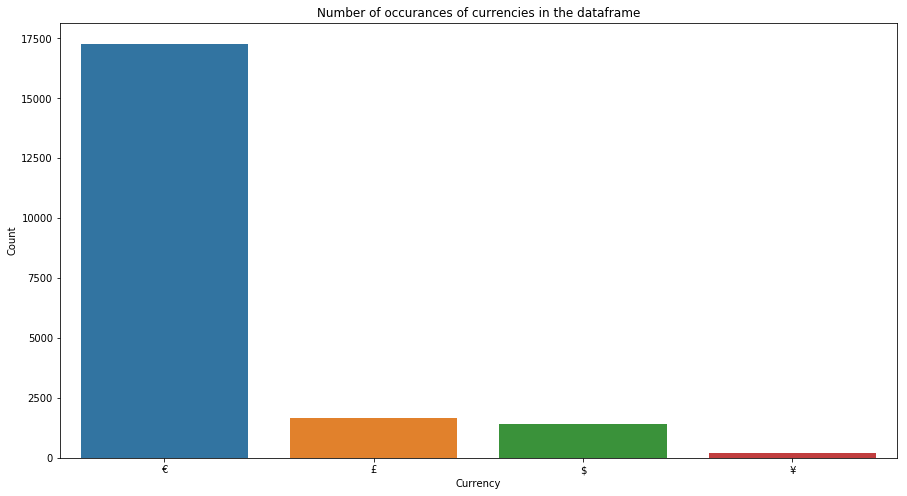

In [158]:
plt.figure(figsize=(15,8))
sns.countplot(x='currency',data=df)
plt.title("Number of occurances of currencies in the dataframe")
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

As we can see, the *euro* is the most common by a mile. This graph shows that it is logical to fill in the missing values for currency with the *euro*.

For the missing types, we can infer that these transactions are positive transactions, as these transactions are by far the most common. 

In [159]:
df.groupby('type').count().reset_index()[['type','part']]

,type,part
0,No type,11
1,negative,56
2,positive,20488


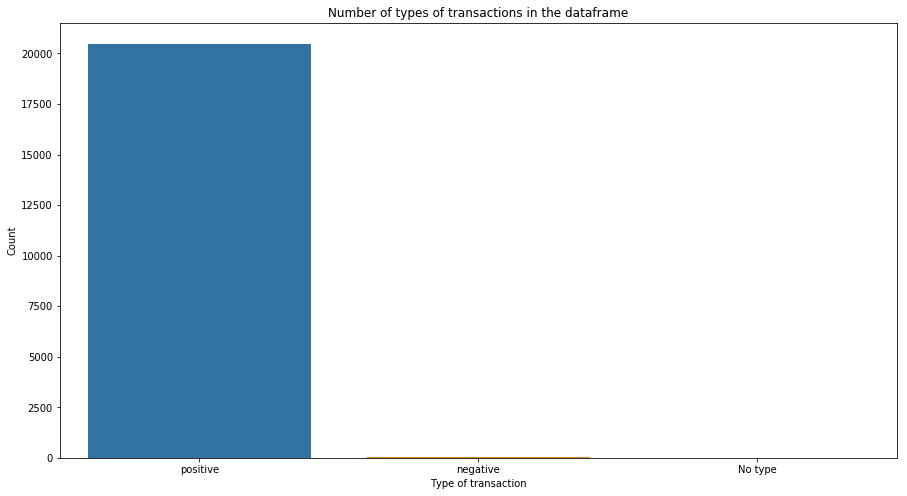

In [160]:
plt.figure(figsize=(15,8))
sns.countplot(x='type',data=df)
plt.title("Number of types of transactions in the dataframe")
plt.xlabel('Type of transaction')
plt.ylabel('Count')
plt.show()

Here we can also see that positive transactions are by far the most common. So we can set the missing values for type as 'positive'

In [161]:
df.replace(to_replace='No type',value='positive',inplace=True)

We can now check if the missing values for the `amount` column pertain to a part that is only paid for in one currency. If so, we can set the missing value to be the average amount paid for said part. If not, we have to wait after we have set all the amounts to be in the same currency. 

In [162]:
parts = [part for part in df[df['amount'].isnull()]['part']]

df[df['part'].isin(parts)].groupby(['part','currency']).count()

company  country  city  date  amount  type
part       currency                                            
10267-2529 $              14       14    14    14      14    14
           £              13       13    13    13      13    13
           ¥               2        2     2     2       2     2
           €             161      161   161   161     160   161
13537-259  $              25       25    25    25      25    25
           £              24       24    24    24      24    24
           ¥               1        1     1     1       1     1
           €             237      237   236   237     236   237
24385-268  $              17       17    17    17      17    17
           £              23       23    23    23      23    23
           ¥               3        3     3     3       3     3
           €             238      238   238   238     237   238
35356-325  $              18       18    18    18      18    18
           £              24       24    24    24      24    24
           €             189      189   188   189     188   189
41163-428  $               9        9     9     9       9     9
           £              15       15    15    15      15    15
           ¥               3        3     3     3       3     3
           €             184      184   184   184     183   184
49349-820  $              13       13    13    13      13    13
           £              11       11    11    11      11    11
           ¥               4        4     4     4       4     4
           €             159      159   159   159     158   159
49967-724  $              16       16    16    16      16    16
           £              18       18    18    18      18    18
           €             228      228   226   228     227   228
52959-433  $              21       21    21    21      21    21
           £              17       17    17    17      17    17
           ¥               2        2     2     2       2     2
           €             253      253   253   253     252   253
54868-0823 $              24       24    24    24      24    24
           £              23       23    23    23      23    23
           ¥               1        1     1     1       1     1
           €             244      244   244   244     243   244
59779-601  $              10       10    10    10      10    10
           £              10       10    10    10      10    10
           €             106      106   105   106     105   106
68084-172  $              21       21    21    21      21    21
           £              13       13    13    13      13    13
           ¥               1        1     1     1       1     1
           €             250      250   250   250     249   250

From this, we can see that the transaction for these parts vary a lot in currency, so we cant set the missing values as the average amount that has been paid for the part.

We can investigate further and see if the company in question has bought this part often. If so, we can set the missing price as the average price they have paid for this part. 

For this, we add a temporary column called `part-company` to be able filter out the tuples of parts and companies that exist where the amount is NaN

In [163]:
df['part-company'] = list(zip(df.part, df.company))
part_company_NAN = list(zip(df[df['amount'].isnull()].part, df[df['amount'].isnull()].company))
part_company_NAN

[('49349-820', 'Chatterbridge'),
 ('10267-2529', 'Thoughtmix'),
 ('13537-259', 'Ntags'),
 ('68084-172', 'Twitterbeat'),
 ('54868-0823', 'Chatterbridge'),
 ('41163-428', 'Avaveo'),
 ('52959-433', 'Buzzbean'),
 ('49967-724', 'Roodel'),
 ('35356-325', 'Thoughtmix'),
 ('24385-268', 'Twitterbeat'),
 ('59779-601', 'Thoughtmix')]

In [164]:
df.head(2)

,part,company,country,city,date,amount,currency,type,part-company
0,54868-5165,Chatterbridge,Spain,Barcelona,2016-01-02 00:01:05,784.79,€,positive,"(54868-5165, Chatterbridge)"
1,60505-2867,Lajo,Greece,Thessaloniki,2016-01-02 00:05:26,187.99,€,positive,"(60505-2867, Lajo)"


We can now filter all the occurances of these transactions (i.e. part bought by a company) from the dataframe

In [165]:
df[df['part-company'].isin(part_company_NAN)].groupby(['part','company','currency']).count()

,,,country,city,date,amount,type,part-company
part,company,currency,,,,,,
10267-2529,Thoughtmix,€,24,24,24,23,24,24
13537-259,Ntags,€,24,24,24,23,24,24
24385-268,Twitterbeat,€,31,31,31,30,31,31
35356-325,Thoughtmix,€,32,32,32,31,32,32
41163-428,Avaveo,€,5,5,5,4,5,5
49349-820,Chatterbridge,€,18,18,18,17,18,18
49967-724,Roodel,€,7,7,7,6,7,7
52959-433,Buzzbean,€,23,23,23,22,23,23
54868-0823,Chatterbridge,€,26,26,26,25,26,26


As we can see, most of these transactions have happened more than 5-10 times and in only one currency. We can thus logically set the missing values for amount to be the average amount the company has paid for this part.

Below we can see the average prices for each (part,company) tuple and how we fill the missing values. 

In [166]:
for pc in part_company_NAN:
    print(round(np.mean(df[(df['part-company'] == pc) & ~(df['amount'].isnull())]['amount']),3),pc,'\n')

529.209 ('49349-820', 'Chatterbridge') 

420.548 ('10267-2529', 'Thoughtmix') 

715.994 ('13537-259', 'Ntags') 

462.626 ('68084-172', 'Twitterbeat') 

163.868 ('54868-0823', 'Chatterbridge') 

120.052 ('41163-428', 'Avaveo') 

337.482 ('52959-433', 'Buzzbean') 

546.528 ('49967-724', 'Roodel') 

523.576 ('35356-325', 'Thoughtmix') 

198.181 ('24385-268', 'Twitterbeat') 

149.408 ('59779-601', 'Thoughtmix') 



In [167]:
def fill_amount_nans(cols):
    amount = cols[0]
    part_company = cols[1]
    
    if(np.isnan(amount)): #Check if the amount is a null value
        #If so, replace the nan value with the mean of what the company has paid for the part
        return np.mean(df[(df['part-company'] == part_company) & ~(df['amount'].isnull())]['amount'])
    else:
        #If not, do nothing.
        return amount

In [168]:
df['amount'] = df[['amount','part-company']].apply(fill_amount_nans,axis=1)

We can now drop the temporary column `part-company`

In [169]:
df.drop('part-company',inplace=True,axis=1)

---

**Date column**

No we have to look at the date column, as it is just a simple string and does not help a lot. We will split the date column into four columns: 

`year`, `month`, `day`, and `time`

In [170]:
df.sample(5)

,part,company,country,city,date,amount,currency,type
15968,76314-002,Gabcube,Portugal,Almada,2018-04-17 00:13:06,439.97,€,positive
19511,0268-6107,Twitterbeat,France,Annecy,2018-11-03 03:22:12,463.38,€,positive
20545,62011-0219,Chatterbridge,Spain,Barcelona,2018-12-30 17:22:21,847.89,€,positive
17214,67544-356,Brainsphere,Portugal,Braga,2018-06-26 03:23:28,801.63,€,positive
1996,67046-030,Flipstorm,France,Nanterre,2016-03-27 18:08:53,167.01,€,positive


Not every single entry is of the form `YYYY-MM-DD HH:MM:SS`. Lets investigate the deviations of the date registered.

In [171]:
df['date'].str[0:4].unique()

array(['2016', '2017', '10/0', '2018', '2019'], dtype=object)

In [172]:
len(df[(df['date'].str.contains(':')) | (df['date'].str.contains('/'))]) == len(df)

False

In [173]:
df[~(df['date'].str.contains(':')) & ~(df['date'].str.contains('/'))]

,part,company,country,city,date,amount,currency,type
2245,13537-468,Brainsphere,Portugal,Braga,2016-04-07,591.68,€,positive
2246,51346-145,Chatterbridge,Spain,Barcelona,2016-04-07,894.79,€,positive
2247,52343-025,Yozio,Greece,Patras,2016-04-07,587.82,€,positive
2248,36800-952,Brainsphere,Portugal,Braga,2016-04-07,221.41,€,positive
2249,49967-724,Flipstorm,France,Nanterre,2016-04-07,547.91,€,positive
9295,52343-025,Thoughtmix,Portugal,Amadora,2017-04-08,662.06,€,positive
9296,49738-105,Chatterbridge,Spain,Barcelona,2017-04-08,442.31,€,positive
9297,55289-164,Zooxo,United Kingdom,London,2017-04-08,414.20,£,positive
19162,63629-2733,Buzzbean,Germany,Düsseldorf,2018-10-13,187.26,€,positive
19163,0268-6107,Thoughtmix,Portugal,Amadora,2018-10-13,466.78,€,positive


As we can see, the year is not registered in the same manner in all observations, and not all observations have a registered time. This has to be taken care of. Those that do register time however, always register it with the format `HH:MM:SS`.

In [174]:
df[df['date'].str.contains('/')]

,part,company,country,city,date,amount,currency,type
9328,0615-7679,Thoughtmix,Portugal,Amadora,10/04/2017,314.43,€,positive
9329,35356-325,Wordify,United States,New York,10/04/2017,330.75,$,positive
9330,0268-1401,Thoughtmix,Portugal,Amadora,10/04/2017,1000.77,€,positive
9331,51138-049,Twitterbeat,France,Annecy,10/04/2017,1032.04,€,positive
9332,68233-011,Brainsphere,Portugal,Braga,10/04/2017,588.07,€,positive
9333,54473-578,Shufflebeat,Portugal,Porto,10/04/2017,192.34,€,positive
9334,54868-0823,Rhycero,France,Arcueil,10/04/2017,108.62,€,positive


We have actually no way of knowing if these observations are of the format `MM/DD/YYYY` or `DD/MM/YYYY` because 10/04 could be month/day and day/month, however, the latter seems more likely. After investigating different time formats between countries, only three countries seem to use the `MM/DD/YYYY` format (India, Philippenes, Panama) but around 33 countries use the other. We will then assume that the date entered in the table above is in the format `DD/MM/YYYY`. 

In [175]:
def get_day(date):
    if('/' in date):
        # We have the format DD/MM/YYYY
        return date[:2]
    else:
        # We have the format YYYY-MM-DD (HH:MM:SS)    
        return date[8:10]

In [176]:
def get_month(date):
    if('/' in date):
        # We have the format DD/MM/YYYY
        return date[3:5]
    else:
        # We have the format YYYY-MM-DD (HH:MM:SS)    
        return date[5:7]

In [177]:
def get_year(date):
    if('/' in date):
        # We have the format DD/MM/YYYY
        return date[6:10]
    else:
        # We have the format YYYY-MM-DD (HH:MM:SS)    
        return date[:4]

In [178]:
def get_time(date):
    if(':' not in date):
        return 'No time'
    else:
        # We have the format YYYY-MM-DD HH:MM:SS 
        return date[11:]

In [179]:
df['time'] = df['date'].apply(get_time)

In [180]:
df['year'] = df['date'].apply(get_year)
df['month'] = df['date'].apply(get_month)
df['day'] = df['date'].apply(get_day)

In [181]:
df.sample(5)

,part,company,country,city,date,amount,currency,type,time,year,month,day
19086,49349-314,Wordify,United States,New York,2018-10-09 02:02:14,520.29,$,positive,02:02:14,2018,10,09
12972,70253-307,Thoughtmix,Portugal,Amadora,2017-10-29 01:34:55,959.90,€,positive,01:34:55,2017,10,29
1179,41163-428,Ntags,Portugal,Lisbon,2016-02-20 13:16:43,135.92,€,positive,13:16:43,2016,02,20
12717,55856-0003,Teklist,Netherlands,Arnhem,2017-10-14 00:57:03,655.65,€,positive,00:57:03,2017,10,14
16550,17156-617,Zooxo,United Kingdom,London,2018-05-20 23:41:34,1083.42,£,positive,23:41:34,2018,05,20


In [182]:
len(df[df['time'] == 'No time'])

26

We have 26 observations that have no `time` registered. We can investigate what time is the most common and see if it is logical to fill in these missing values, or at least set it to the most common hour.

In [183]:
hours = []
for time in df['time']:
    if time != 'No time':
        hours.append(time[:2])

In [184]:
max(set(hours), key = hours.count)

'16'

As we can see, 16 is the most common hour, so we will set the missing `time` values to `16:00:00`

In [185]:
df.replace(to_replace='No time',value='16:00:00',inplace=True)

Now we can drop the date column. 

In [186]:
df.drop('date',axis=1,inplace=True)

A sample of the dataset after the data has been cleaned. 

In [187]:
df.sample(10)

,part,company,country,city,amount,currency,type,time,year,month,day
8414,55856-0003,Thoughtmix,Portugal,Amadora,641.29,€,positive,12:28:59,2017,02,15
20477,65044-3014,Roodel,Portugal,Aranhas,955.57,€,positive,04:43:38,2018,12,26
9933,49349-842,Wordify,United States,New York,270.96,$,positive,21:06:09,2017,05,10
17714,0603-6134,Brainsphere,Portugal,Braga,796.00,€,positive,11:27:36,2018,07,22
12909,49349-106,Twitterbeat,France,Annecy,476.06,€,positive,18:06:11,2017,10,25
617,51060-032,Brainsphere,Portugal,Braga,744.49,€,positive,12:39:36,2016,01,27
7775,17156-617,Shufflebeat,Portugal,Porto,844.54,€,positive,13:00:41,2017,01,12
1092,51060-032,Zooxo,United Kingdom,London,649.70,£,positive,19:07:30,2016,02,16
228,0268-1128,Thoughtmix,Portugal,Amadora,1129.01,€,positive,16:47:05,2016,01,11
19652,51346-145,Wordify,United States,New York,994.95,$,positive,00:30:42,2018,11,11


Lets check if there is any observation that has a time string longer than 8 (the normal length), a year longer than 4 letters, a month longer than 2 letters or a day longer than 2 letters. 

In [188]:
df[(df['time'].str.len() > 8) | (df['year'].str.len() > 4) | (df['month'].str.len() > 2) | (df['day'].str.len() > 2)]

,part,company,country,city,amount,currency,type,time,year,month,day


Lets check the different values for these three columns: 

In [189]:
df['year'].unique()

array(['2016', '2017', '2018', '2019'], dtype=object)

In [190]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [191]:
df['day'].unique()

array(['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '01', '32'],
      dtype=object)

As we can see, there is a `day` in there that has the day as `32`. As we know, this cannot be correct.

In [192]:
df[df['day'] == '32']

,part,company,country,city,amount,currency,type,time,year,month,day
3539,17156-617,Thoughtmix,Portugal,Amadora,791.86,€,positive,07:22:28,2016,06,32
3540,54868-5165,Shufflebeat,Portugal,Porto,525.24,€,positive,08:08:48,2016,06,32


We will change the date to be the date the last day of june, i.e. june 30th. 

In [193]:
df['day'].replace('32','30',inplace=True)

Above we can see that there now exists no observations that does not belong.

---

**Summary:**

The `part` column was analyzed and we filled in the missing values with the average price the company had paid for the part.

The `company` column had some weird observations and they were fixed by looking at the column as a whole, correcting it and removing observations that did not belong. 

The missing values in the `country` and `city` columns were filled in by analyzing how they connect to the company column. 

The `price` column was split into three columns, namely `amount`, `currency`, and `type`. The missing values were filled in by the average of the `price` for each (part-company) tuple that appeared, the missing values for `currency` were set to be the currencies the corresponding company *always* paid with, and the type was set to be positive, as the ratio between positive and negative transactions is $20488$/$56$ 

Lastly, the date column was split into four columns, `year`, `month`, `day`, and `time` in order to gain more information from that column.

---
## Part 2: Enriching the data

A common task for a data scientists is to combine or enrich data from internal sources with data available from external sources. The purpose of this can be either to fix issues with the data or to make it easier to derive insights from the data.

In this part you should enrich your data with data from at least one external source. You may look to part 4 for some  inspiration as to what is required. Your solution should be automated, i.e., you can not ask the reader of your notebook to download any data manually. You should argue why and what you expect to achieve by the enrichments you are doing.

---
### Solution

We feel that we have enriched the data by noting that each company serves only one country (except for one), and by noticing that, we have been able to fill in the information missing from countries and cities. 

We can enrich our data with some geo locations of where the transaction took place, in order to be able to analyze it better, i.e. to be able to create a heatmap of the world and more.

We feel that we have also enriched the data by splitting the `date` column into more applicable columns for data analysis. 

The best way to enrich the data to make it easier to analyze, is to use external API in order to turn all the amounts into the same currency. 

Because the *Euro* is the most common currency in this database, we will turn other amounts into euros by looking at the rate of the euro against the currency in which they were registered in on the date the transaction took place, i.e. the process will be the following: 

* Find transactions that are not in Euros. 
* Check the date those transactions took place. 
* Connect to an external API in order to compare the price of the euro against that currency on aformentioned date. 
* Store that amount instead of the other currency.

For this we can use the *exchangeratesapi*.

We also decided to enrich the data by adding a column denoting the *weekday* the transaction took place. This could be used for analysis in order to see how transactions differ as the week progresses. 


In [194]:
import requests

In [195]:
len(df[df['currency'] != '€'])

3274

We have 3274 observations that are not in Euros. Lets go through each one and fetch the corresponding euro amount. As the API does not always carry the rate of that exact date, we will average over the month the transaction took place.

In [196]:
def change_amount_to_EUR(cols):
    currency = cols[0]
    amount = cols[1]
    year = cols[2]
    month = cols[3]

    if(currency == '€'): #Do nothing if we are looking at a Euro
        return amount
    else:
        #Initialize the parameters for the API
        start_at = "{}-{}-{}".format(year, month, '01')
        if(month == '02'):
            end_at = "{}-{}-{}".format(year,month,'28')
        else:
            end_at = "{}-{}-{}".format(year,month,'30')

        #Fetch the base
        if(currency == '$'):
            symbol = 'USD'
        elif(currency == '¥'):
            symbol = 'JPY'
        else:
            symbol = 'GBP'

        #Fetch the API
        url = 'https://api.exchangeratesapi.io/history'
        params = {'base': 'EUR', 'start_at': start_at, 'end_at': end_at,'symbols': symbol}
        r = requests.get(url, params=params)

        #Go through the values and take the average amount over a month
        values = []
        for date, value in r.json()['rates'].items():
            values.append(value[symbol])
            
        return amount/(np.average(values))

Now we can apply this method to the database where 

In [197]:
df['amount (EUR)'] = df[['currency','amount','year','month']].apply(change_amount_to_EUR, axis=1)

We could now drop the 'currency' column, but lets keep the information about the original currency in that column.

We could remove this column and only have the EURO amount column, but we decided that keeping this information could prove useful. 

In [201]:
df.head(5)

,part,company,country,city,amount,currency,type,time,year,month,day,amount (EUR)
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79,€,positive,00:01:05,2016,01,02,784.79
1,60505-2867,Lajo,Greece,Thessaloniki,187.99,€,positive,00:05:26,2016,01,02,187.99
2,24385-268,Flipstorm,Greece,Athens,221.73,€,positive,00:18:30,2016,01,02,221.73
3,76117-001,Twitterbeat,France,Annecy,1075.82,€,positive,02:32:30,2016,01,02,1075.82
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55,€,positive,04:51:55,2016,01,02,412.55


**Adding the weekday column**

By adding a column denoting the day of week a transaction happened, we can enrich the data for analysis. This can be used to analyze which day of week most transactions happen and more. 

In [202]:
from datetime import datetime

In [203]:
def get_weekday_string(cols):
    weekdays = {0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
    day = cols[0]
    month = cols[1]
    year = cols[2]
    date = ' '.join([day, month, year])
    return weekdays[datetime.strptime(date, '%d %m %Y').weekday()]

In [204]:
df['weekday'] = df[['day','month','year']].apply(get_weekday_string, axis=1)

In [205]:
df.sample(10)

,part,company,country,city,amount,currency,type,time,year,month,day,amount (EUR),weekday
13780,16714-295,Ntags,Portugal,Lisbon,746.75,€,positive,18:11:28,2017,12,13,746.75,wednesday
16007,54473-578,Riffpath,Greece,Heraklion,247.59,€,positive,18:59:15,2018,04,18,247.59,wednesday
16907,49035-530,Twitterbeat,France,Annecy,1095.19,€,positive,09:44:02,2018,06,09,1095.19,saturday
19807,55856-0003,Buzzbean,Germany,Düsseldorf,211.92,€,positive,20:49:07,2018,11,18,211.92,sunday
12483,55566-2100,Brainsphere,Portugal,Braga,415.18,€,positive,11:55:46,2017,09,30,415.18,saturday
2545,49035-530,Buzzbean,Germany,Düsseldorf,997.30,€,positive,18:33:52,2016,04,21,997.30,thursday
15468,49035-530,Roodel,Portugal,Aranhas,943.18,€,positive,10:39:49,2018,03,20,943.18,tuesday
5068,60505-2867,Brainsphere,Portugal,Braga,137.87,€,positive,10:08:50,2016,08,26,137.87,friday
17470,24286-1562,Ntags,Portugal,Lisbon,331.69,€,positive,11:40:09,2018,07,09,331.69,monday
19478,0268-1401,Twitterbeat,France,Annecy,836.12,€,positive,02:01:52,2018,11,01,836.12,thursday


We have enriched the data by using the exchange rate API to create a column denoting the transaction amount in one currency, namely in Euros. 

We have also enriched the data by creating a column which denotes on which day of the week a transaction took place.

---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

---
### Solution

The database for Weyland-Yutani will consist of the following tables:

**Countries:** The countries table stores all countries where Weyland-Yutani customers have offices.

**Cities:** The cities table stores the name of all cities where Weyland-Yutani customers have offices along with a country id.

**Companies:** The companies table stores the name of each Weyland-Yutani customer along with the id of the country and the city they are based in.

**Products:** The products table stores the name of all products Weyland-Yutani offers.

**Sales:** The Sales table stores all transactions made by the customers of Weyland-Yutani, it stores the purchase amount, date and time of the purchase, the id of the company and the id of the product purchased.

In [233]:
import sqlite3

In [234]:
# Create a connection to the database
con = sqlite3.connect('weylandyutani.sqlite')
cur = con.cursor()

The countries table allows a unique country name and an id representing the corresponding country.

In [235]:
# SQL query to create countries table
create_countries = '''
    CREATE TABLE IF NOT EXISTS countries (
       id INTEGER PRIMARY KEY,
       name STRING NOT NULL,
       UNIQUE (name)
    ) 
'''
# Create countries table
cur.execute(create_countries)
con.commit()

All unique countries are extracted from the dataframe, sorted and inserted into the countries table.

In [236]:
# SQL query to insert data into the countries table
insert_countries = '''
    INSERT OR IGNORE INTO countries (name) 
    VALUES (?)
'''
# Get all countries from the dataframe and sort them
unique_countries = df['country'].unique()
unique_countries = np.sort(unique_countries)

# Insert countries into the countries table
for country in unique_countries:
    cur.execute(insert_countries, (country,))

con.commit()

In [237]:
# Make sure countries were inserted
select_countries = '''
    SELECT countries.name AS Country
    FROM countries
    LIMIT 5
'''
pd.read_sql_query(select_countries, con)

,Country
0,France
1,Germany
2,Greece
3,Japan
4,Netherlands


The cities table stores the name of cities where Weyland-Yutani's customers are located and an id representing the corresponding city, each city can be connected to a country with a foreign key countryID.

In [238]:
# SQL query to create cities table
create_cities = '''
    CREATE TABLE IF NOT EXISTS cities (
       id INTEGER PRIMARY KEY,
       name STRING NOT NULL,
       countryID INTEGER,
       UNIQUE(name, countryID)
       FOREIGN KEY (countryID) REFERENCES countries (id)
    ) 
'''
# Create cities table
cur.execute(create_cities)
con.commit()

In [239]:
# This function returns the id of a country given the name of the country
def get_country_id_by_name(cur, country_name):
    get_country_id = '''
    SELECT countries.id 
    FROM countries 
    WHERE countries.name 
    IS (?)'''
    
    return cur.execute(get_country_id, (country_name,)).fetchone()[0]

To insert cities into the cities table, all unique cities are extracted from the data frame along with the name of the country. Then the id of the country is fetched and inserted into the table along with the name of the city. A placeholder city is also added to the table with the id of 0 and the name *N/A* in case a city hasn't been stated for a company.

In [240]:
# SQL query to insert data into the cities table
insert_cities = '''
    INSERT OR IGNORE INTO cities (name, countryID)
    VALUES (?, ?)
'''

# Get unique cities and country from dataframe and sort them
unique_cities = df[['country', 'city']]
unique_cities = unique_cities.drop_duplicates(['country', 'city'], keep='last').sort_values(by=['city'])

# Insert cities into the cities table
for index, rows in unique_cities.iterrows():
    # If no country is stated for the city the country gets the id of 0
    if not pd.isnull(rows['country']):
        country_id = get_country_id_by_name(cur, rows['country'])
    else:
        country_id = 0
    cur.execute(insert_cities, (rows['city'], country_id,))

# In the case a city is not stated in the df we add a placeholder city with the id of 0
insert_placeholder_city = '''
    INSERT OR IGNORE INTO cities (id, name)
    VALUES (0, 'N/A')
'''
cur.execute(insert_placeholder_city)
con.commit()

In [241]:
# Make sure cities were inserted
select_cities = '''
    SELECT cities.name AS City, countries.name AS Country
    FROM cities
    INNER JOIN countries ON cities.countryID=countries.ID
    LIMIT 5
'''
pd.read_sql_query(select_cities, con)

,City,Country
0,Almada,Portugal
1,Amadora,Portugal
2,Amiens,France
3,Amsterdam,Netherlands
4,Annecy,France


The companies table stores the name of the company along with the id of the city and country it is located in as foreign keys. If a company has more than one location it will have a unique entry in the table for each location.

In [242]:
# SQL query to create companies table
create_companies = '''
    CREATE TABLE IF NOT EXISTS companies (
       id INTEGER PRIMARY KEY,
       name STRING NOT NULL,
       countryID INTEGER,
       cityID INTEGER,
       UNIQUE(name, countryID, cityID),
       FOREIGN KEY (countryID) REFERENCES countries (id),
       FOREIGN KEY (cityID) REFERENCES cities (id)
    ) 
'''
# Create companies table
cur.execute(create_companies)
con.commit()

In [243]:
# This function fetches the id of a city given the name of the city
def get_city_id_by_name(cur, city_name):
    get_city_id = '''
    SELECT cities.id
    FROM cities 
    WHERE cities.name 
    IS (?)
    '''
    
    return cur.execute(get_city_id, (city_name,)).fetchone()[0]

To insert companies into the companies table, all companies are extracted from the dataframe along with the location of the company. Since there are no companies listed without stating a country we will not worry about that here but some companies are listed without a city, in that case the company is added with the city id of 0 as mentioned above.

In [244]:
# SQL query to insert data into the companies table
insert_companies = '''
    INSERT OR IGNORE INTO companies (name, countryID, cityID)
    VALUES (?, ?, ?)
'''

# Get all companies and their location from the dataframe and sort them 
unique_companies = df[['company', 'country', 'city']]
unique_companies = unique_companies.drop_duplicates(['company', 'country', 'city'], keep='last').sort_values(by=['company'])

# Isert data into the companies table
for index, rows in unique_companies.iterrows():
    company_name = rows['company']
    country_id = get_country_id_by_name(cur, rows['country'])
    # If no city is stated it gets the id of 0
    if not pd.isnull(rows['city']):
        city_id = get_city_id_by_name(cur, rows['city'])
    else: 
        city_id = 0
        
    cur.execute(insert_companies, (company_name, country_id, city_id,))
    
con.commit()

In [245]:
# Make sure companies were inserted
select_companies = '''
    SELECT companies.name AS company, countries.name AS country, cities.name AS city
    FROM companies
    INNER JOIN countries ON companies.countryID=countries.ID
    INNER JOIN cities ON companies.cityID=cities.ID
    LIMIT 5
'''
pd.read_sql_query(select_companies, con)

,company,country,city
0,Avaveo,France,Nice
1,Brainsphere,Portugal,Monção
2,Brainsphere,Portugal,N/A
3,Brainsphere,Portugal,Braga
4,Bubblemix,Japan,Asaka


The products table is very straight forward and it only contains the product name and the id of the product. If it should be modified in the future the price of the product could be added, perhaps in different currencies. A description of the product would also be a good idea and it could store category of the product. Categories would be best kept in a separate table. 

In [246]:
# SQL query to create products table
create_products = '''
    CREATE TABLE IF NOT EXISTS products (
       id INTEGER PRIMARY KEY,
       name STRING NOT NULL, 
       UNIQUE (name)
    ) 
'''
# Create products table
cur.execute(create_products)
con.commit()

To insert the products into the table, all unique products are extracted from the dataframe and sorted and finally inserted into the table.

In [247]:
# SQL query to insert data into the products table
insert_products = '''
    INSERT OR IGNORE INTO products (name)
    VALUES (?)
'''
# Get unique products from the dataframe and sort them
unique_products = df['part'].unique()
unique_products = np.sort(unique_products)

# Insert products into the products table
for product in unique_products:
    cur.execute(insert_products, (product,))

con.commit()

In [248]:
# Make sure products were inserted
select_products = '''
    SELECT products.name AS product
    FROM products
    LIMIT 5
'''
pd.read_sql_query(select_products, con)

,product
0,0185-0373
1,0228-2167
2,0268-1128
3,0268-1401
4,0268-1604


The sales table hold all transactions made to Weyland-Yutani. It contains a sales id, the amount of the purchase in EUROs along with the original currency of the purchase. It also stores a company id and a product id as foreign key. All transactions must be unique.

In [257]:
# SQL query to create sales table
create_sales = '''
    CREATE TABLE IF NOT EXISTS sales (
       id INTEGER PRIMARY KEY,
       amount_EUR REAL NOT NULL,
       original_amount REAL NOT NULL,
       original_currency STRING NOT NULL,
       datetime DATETIME NOT NULL,
       companyID INTEGER NOT NULL,
       productID INTEGER NOT NULL,
       FOREIGN KEY (companyID) REFERENCES companies (id),
       FOREIGN KEY (productID) REFERENCES products (id)
       UNIQUE(id, amount_EUR, original_currency, datetime, companyID, productID)
   ) 
'''
# Create sales table
cur.execute(create_sales)
con.commit()

In [258]:
# This function returns a company id given the name, country and the city of the company
def get_company_id(cur, company_name, country_id, city_id):
    get_company_id = '''
        SELECT companies.id
        FROM companies
        WHERE companies.name
        IS (?) AND
        countryID IS (?) AND
        cityID IS (?)
    '''
    return cur.execute(get_company_id, (company_name, country_id, city_id,)).fetchone()[0]

In [259]:
# This function returns a product id given a product name
def get_product_id_by_name(cur, product_name):
    get_product_id = '''
        SELECT products.id
        FROM products
        WHERE products.name
        IS (?)
    '''
    return cur.execute(get_product_id, (product_name,)).fetchone()[0]

In [260]:
# This function takes in day, month, year and time and formats it for SQLite YYYY-MM-DD HH:MM:SS
def format_date(day, month, year, time):
    datetime = str(year) + '-' + str(month) + '-' + str(day) + ' ' + str(time)
    return datetime

In [261]:
# SQL query to insert data into the sales table
insert_sales = '''
    INSERT OR IGNORE INTO sales (amount_EUR, original_amount, original_currency, datetime, companyID, productID)
    VALUES (?, ?, ?, ?, ?, ?)
'''

# Sort the dataframe by order date
df.sort_values(by=['year', 'month', 'day', 'time'])

# Insert transactions into the sales table
for index, rows in df.iterrows():
    amount = float(rows['amount (EUR)'])
    original_amount = float(rows['amount'])
    currency = rows['currency']
    # Make sure the date is on the YYYY-MM-DD HH-MM-SS
    datetime = format_date(rows['day'], rows['month'], rows['year'], rows['time'])
    country_id = get_country_id_by_name(cur, (rows['country']))
    
    if not pd.isnull(rows['city']):
        city_id = get_city_id_by_name(cur, (rows['city']))
    else:
        city_id = 0
        
    company_id = get_company_id(cur, rows['company'], country_id, city_id)
    product_id = get_product_id_by_name(cur, rows['part'])
    
    cur.execute(insert_sales, (amount, original_amount, currency, datetime, company_id, product_id,))                                
con.commit()

In [264]:
# Make sure the transactions were inserted into the sales table
select_sales = '''
    SELECT printf("%,d", sales.amount_EUR) AS amount_EUR, printf("%,d", sales.original_amount) AS original_amount, sales.original_currency, sales.datetime, companies.name AS company, cities.name AS city, products.name AS product
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    INNER JOIN cities ON companies.cityID = cities.id
    INNER JOIN products ON products.id = sales.productID
    LIMIT 10
'''
pd.read_sql_query(select_sales, con)


,amount_EUR,original_amount,original_currency,datetime,company,city,product
0,784,784,€,2016-01-02 00:01:05,Chatterbridge,Barcelona,54868-5165
1,187,187,€,2016-01-02 00:05:26,Lajo,Thessaloniki,60505-2867
2,221,221,€,2016-01-02 00:18:30,Flipstorm,Athens,24385-268
3,"1,075","1,075",€,2016-01-02 02:32:30,Twitterbeat,Annecy,76117-001
4,412,412,€,2016-01-02 04:51:55,Chatterbridge,Barcelona,44946-1046
5,359,359,€,2016-01-02 07:20:59,Chatterbridge,Barcelona,16729-167
6,266,266,€,2016-01-02 07:40:37,Voomm,Paris,52125-444
7,103,103,€,2016-01-02 08:57:57,Buzzbean,Düsseldorf,43419-018
8,934,704,£,2016-01-02 09:09:01,Zooxo,London,54092-515
9,317,317,€,2016-01-02 11:01:32,Lajo,Thessaloniki,24286-1562


In [265]:
con.close()

---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

---
### Solution

In [266]:
# Create a connection to the database
con = sqlite3.connect('weylandyutani.sqlite')
cur = con.cursor()

In [267]:
pd.options.display.float_format = '{:,.2f}'.format

**Who are the most profitable clients?**

Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

The queries below fetches Weyland-Yutani's all time most profitable clients sorted by revenue generated and sorted by number of purchases they have made. The results show that Thoughtmix and Twitterbeat generate by far the most revenue for Weyland-Yutani followed by Zooxo, Shufflebeat and Chatterbridge.

In [275]:
#Top 5 clients by revenue
select_top_clients_by_revenue = '''
    SELECT companies.name AS Company, SUM(sales.amount_EUR) AS TotalRevEUR, COUNT(sales.amount_EUR) AS TotalSales
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    GROUP BY companies.name
    ORDER BY SUM(sales.amount_EUR) DESC
    LIMIT 5
'''
top_clients_by_revenue = pd.read_sql_query(select_top_clients_by_revenue, con)
top_clients_by_revenue

,Company,TotalRevEUR,TotalSales
0,Thoughtmix,"1,625,650.89",2795
1,Twitterbeat,"1,325,145.85",2267
2,Zooxo,"996,227.74",1672
3,Shufflebeat,"921,867.88",1553
4,Chatterbridge,"920,042.74",1589


In [277]:
title_font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 16,
}

label_font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 14,
}

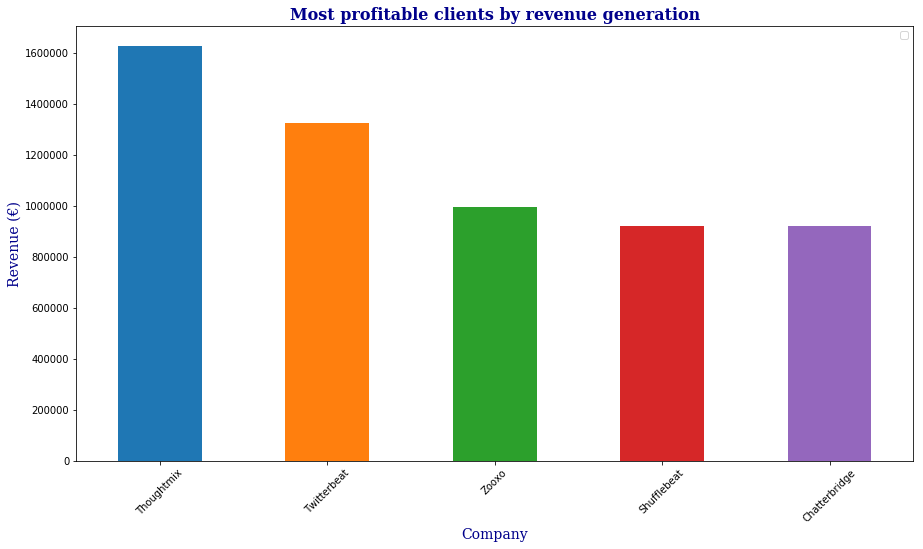

In [286]:
top_clients_by_revenue.plot.bar(x="Company", y="TotalRevEUR",figsize=(15,8))
plt.legend("")
plt.xticks(rotation=45)
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.xlabel("Company", fontdict=label_font)
plt.title("Most profitable clients by revenue generation", fontdict=title_font)
plt.show()

**What are Weyland-Yutani's least profitable clients?**

Knowing which companies generate the least amount of profits can also assist in resource allocation assessment. 

The query below fetches Weyland-Yutani's clients with the least revenue generation. To show that this is not biased by new customers or customers with a single purchase we also get the day of their first and last purchase. All the customers with the lowest revenue generation have been customers since 2016 and are still customers in 2018. 

In [287]:
# Bottom 10 clients
select_bottom_clients = '''
    SELECT companies.name AS Company, SUM(sales.amount_EUR) AS TotalSales, MIN(DATE(sales.datetime)) AS FirstPurchase, MAX(DATE(sales.datetime)) AS LastPurchase
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    INNER JOIN countries ON countries.id = companies.countryID
    GROUP BY companies.name
    ORDER BY SUM(sales.amount_EUR) ASC
    LIMIT 5
'''
bottom_clients = pd.read_sql_query(select_bottom_clients, con)
bottom_clients

,Company,TotalSales,FirstPurchase,LastPurchase
0,Tagtune,"6,579.64",2016-03-31,2018-12-06
1,Gabtune,"18,359.27",2016-01-30,2018-11-26
2,Gevee,"22,549.16",2016-02-22,2018-12-13
3,Innojam,"25,539.63",2016-01-03,2018-10-07
4,Bubblemix,"27,182.87",2016-02-12,2018-12-08


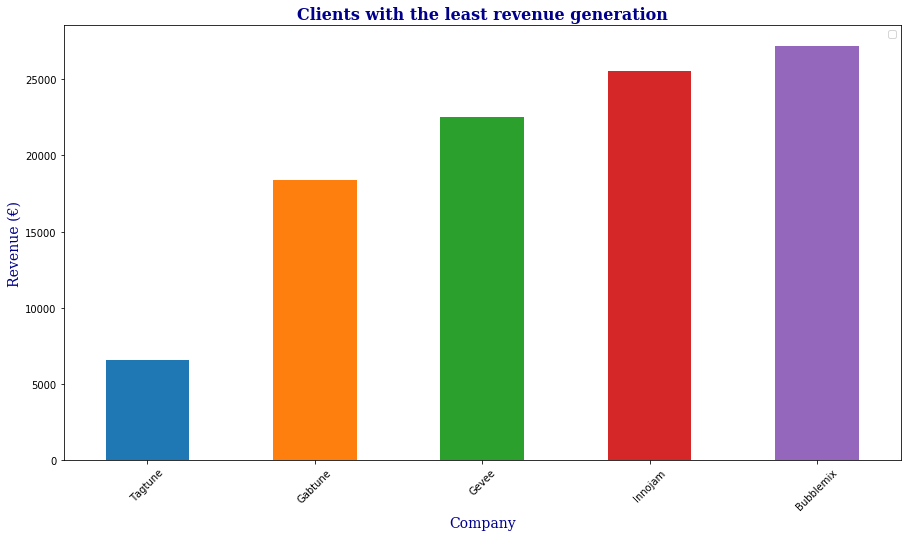

In [289]:
bottom_clients.plot.bar(x="Company", y="TotalSales",figsize=(15,8))
plt.legend("")
plt.xticks(rotation=45)
plt.title("Clients with the least revenue generation",fontdict=title_font)
plt.ylabel('Revenue (€)',fontdict=label_font)
plt.xlabel('Company',fontdict=label_font)

plt.show()

**What are Weyland-Yutani's most and least valueable products?**

Knowing which product is the most valuable asset can help our boss know which product might be valuable to focus our attention to, i.e. market it even more. This can also be helpful to see which products do not carry their own weight, i.e. do not generate much wealth. This could lead to the decision to drop some products and focus more on the more valuable. 

The table and plot give a good overview of Weyland-Yutan's products that generate most revenue. We also take a look at the products that generate the least revenue along with the most sold and least sold products.

In [292]:
select_top_product = '''
    SELECT products.name AS Product, SUM(sales.amount_EUR) AS TotalSales
    FROM sales
    INNER JOIN products ON products.id = sales.productID
    GROUP BY sales.productID
    ORDER BY SUM(sales.amount_EUR) DESC
    LIMIT 10
'''
top_products = pd.read_sql_query(select_top_product, con)
top_products

,Product,TotalSales
0,17156-617,"298,169.77"
1,51346-145,"279,400.56"
2,51138-049,"271,728.14"
3,68462-565,"249,890.63"
4,62011-0219,"241,040.27"
5,49349-106,"230,295.82"
6,51523-002,"227,657.00"
7,68752-024,"225,833.00"
8,49520-501,"224,968.95"
9,36987-1697,"224,068.99"


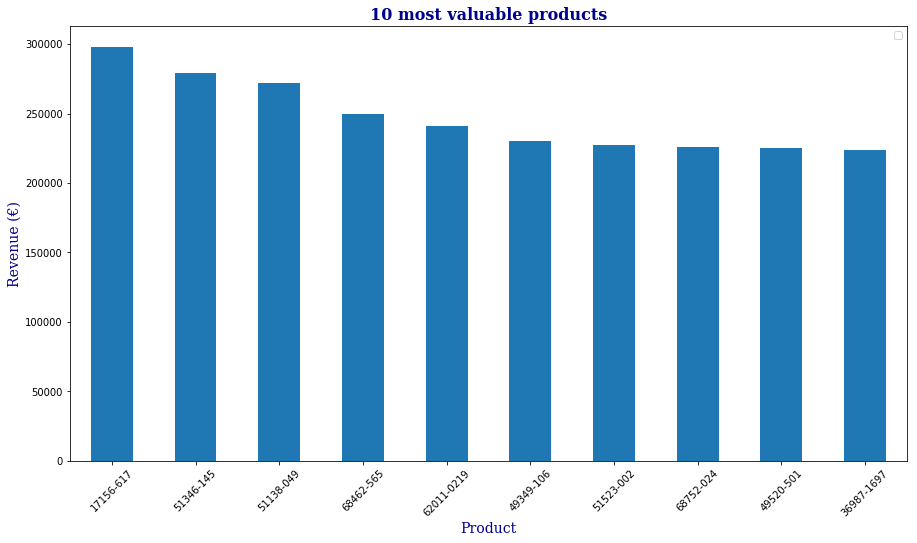

In [295]:
top_products.plot.bar(x="Product", figsize=(15,8))
plt.legend("")
plt.xticks(rotation=45)
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.xlabel('Product',fontdict=label_font)
plt.title("10 most valuable products", fontdict=title_font)
plt.show()

In [301]:
select_popular_product = '''
    SELECT products.name AS Product, COUNT(sales.productID) AS QuantitySold
    FROM sales
    INNER JOIN products ON products.id = sales.productID
    GROUP BY sales.productID
    ORDER BY COUNT(sales.productID) DESC
    LIMIT 10
'''
popular_products = pd.read_sql_query(select_popular_product, con)
popular_products

,Product,QuantitySold
0,17156-617,299
1,37205-992,294
2,0268-6107,293
3,52959-433,293
4,54868-0823,292
5,62011-0219,291
6,51346-145,288
7,13537-259,287
8,58118-5060,286
9,10237-832,285


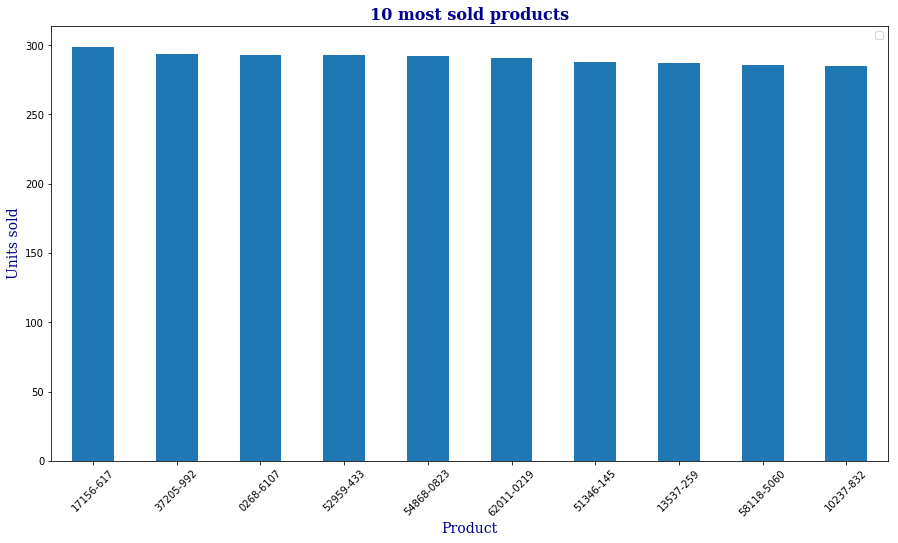

In [467]:
popular_products.plot.bar(x="Product", figsize=(15,8))
plt.legend("")
plt.xticks(rotation=45)
plt.ylabel("Units sold", fontdict=label_font)
plt.xlabel('Product',fontdict=label_font)
plt.title("10 most sold products", fontdict=title_font)
plt.show()

We can see that no *single* product stands out as the main revenue maker, but rather that there are a few valuable assets that do seem to generate the most revenue, e.g. 17156-617, 51346-145 and 51138-049.

The results below show the products that give the least revenue along with the first purchase of the product to make sure we aren't including any new products that could affect the results.

In [304]:
select_bottom_product = '''
    SELECT products.name AS Product, SUM(sales.amount_EUR) AS TotalSales, MIN(DATE(sales.datetime)) AS FirstPurchase
    FROM sales
    INNER JOIN products ON products.id = sales.productID
    GROUP BY sales.productID
    ORDER BY SUM(sales.amount_EUR) ASC
    LIMIT 5
'''
bottom_products = pd.read_sql_query(select_bottom_product, con)
bottom_products

,Product,TotalSales,FirstPurchase
0,54123-957,"20,574.70",2016-01-04
1,59779-601,"20,918.72",2016-01-29
2,63629-2733,"22,204.86",2016-01-07
3,49288-0655,"24,433.82",2016-01-04
4,51346-126,"24,853.51",2016-01-04


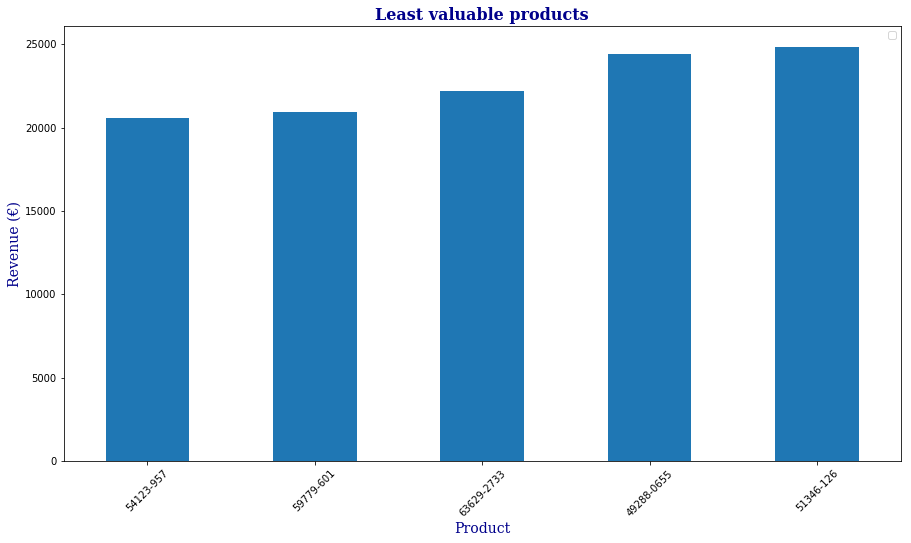

In [305]:
bottom_products.plot.bar(x="Product", figsize=(15,8))
plt.legend("")
plt.xticks(rotation=45)
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.xlabel("Product", fontdict=label_font)
plt.title("Least valuable products", fontdict=title_font)
plt.show()

In [472]:
select_unpopular_product = '''
    SELECT products.name AS Product, COUNT(sales.productID) AS QuantitySold, AVG(sales.amount_EUR) AS AveragePrice
    FROM sales
    INNER JOIN products ON products.id = sales.productID
    GROUP BY sales.productID
    ORDER BY COUNT(sales.productID) ASC
'''
unpopular_product = pd.read_sql_query(select_unpopular_product, con)
unpopular_product.head(20)

,Product,QuantitySold,AveragePrice
0,59779-028,101,759.33
1,62742-4030,103,536.51
2,63629-2733,108,205.60
3,76335-006,109,369.76
4,49288-0655,115,212.47
5,41167-0843,116,551.09
6,16477-306,117,992.75
7,49288-0285,124,922.06
8,76117-001,124,975.31
9,51531-9500,126,982.45


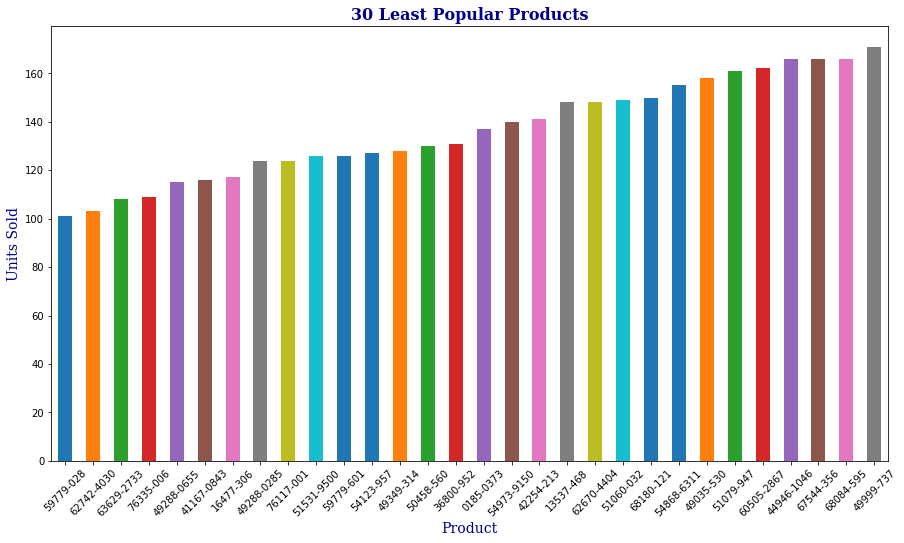

In [476]:
unpopular_product.head(30).plot.bar(x='Product', y="QuantitySold", figsize=(15,8), legend=None)
plt.xlabel("Product", fontdict=label_font)
plt.xticks(rotation=45)
plt.ylabel('Units Sold', fontdict=label_font)
plt.title("30 Least Popular Products", fontdict=title_font)
plt.show()

The argument could be made that adjusting the prices of those products that are not the worst sellers when it comes to units, but do not generate some revenue, or the other way around, would make sense. 

For example, the product 59779-601 is the least profitable product, but is the 12th least sold product. It is obvious that is being bought somewhat, but the price of it isn't enough to generate more profit.  

**Is there any correlation between the Average Price Paid for a product and the Units that are bought?**

In order to see if pricing should be adjusted for some of the products, we can see if there exists any correlation between the average price of a product and how many units are bought. 

If there is a product that is sold very often, but the price isn't as high as some others, our boss could see that raising the price of said product could make sense. 

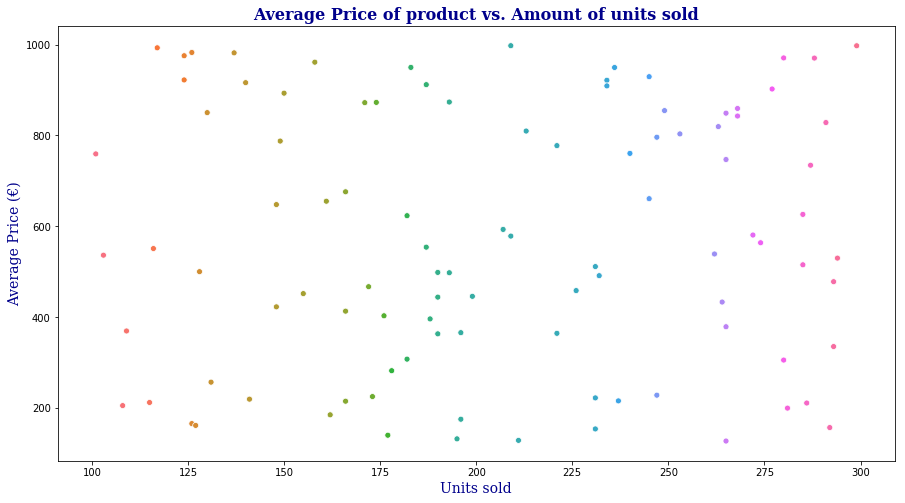

In [483]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="QuantitySold", y="AveragePrice", data=unpopular_product, hue='Product', legend=None)
plt.title("Average Price of product vs. Amount of units sold",fontdict=title_font)
plt.xlabel("Units sold", fontdict=label_font)
plt.ylabel("Average Price (€)", fontdict=label_font)
plt.show()

As we can see, there exists almost no correlation between the two attributes. This should be investigated to see if the price for products that are sold very often but the average price is very low, should be adjusted. 

**Which countries generate the most revenue for Weyland-Yutani?**

Knowing which countries are doing the most business with the company could shed light on possible *hubs* in our transaction network and could help our boss decide if a possible collaboration with the countries could be profitable, i.e. if some countries are doing way more business with the company, it could prove valuable to expand to those countries. 

The results below list countries by the amount of revenue generated. 

In [318]:
select_top_countries_by_revenue = '''
    SELECT countries.name AS Country, SUM(sales.amount_EUR) AS TotalRevEUR
    from sales
    INNER JOIN companies ON companies.id = sales.companyID
    INNER JOIN countries on countries.id = companies.countryID
    GROUP BY countries.name
    ORDER BY SUM(sales.amount_EUR) DESC
    LIMIT 10
'''
top_countries_by_revenue = pd.read_sql_query(select_top_countries_by_revenue, con)
top_countries_by_revenue

,Country,TotalRevEUR
0,Portugal,"4,765,763.25"
1,France,"2,262,901.19"
2,Greece,"1,036,562.28"
3,United Kingdom,"996,227.74"
4,Spain,"920,042.74"
5,United States,"795,703.35"
6,Germany,"714,250.05"
7,Netherlands,"267,251.69"
8,Japan,"99,496.74"
9,Switzerland,"6,579.64"


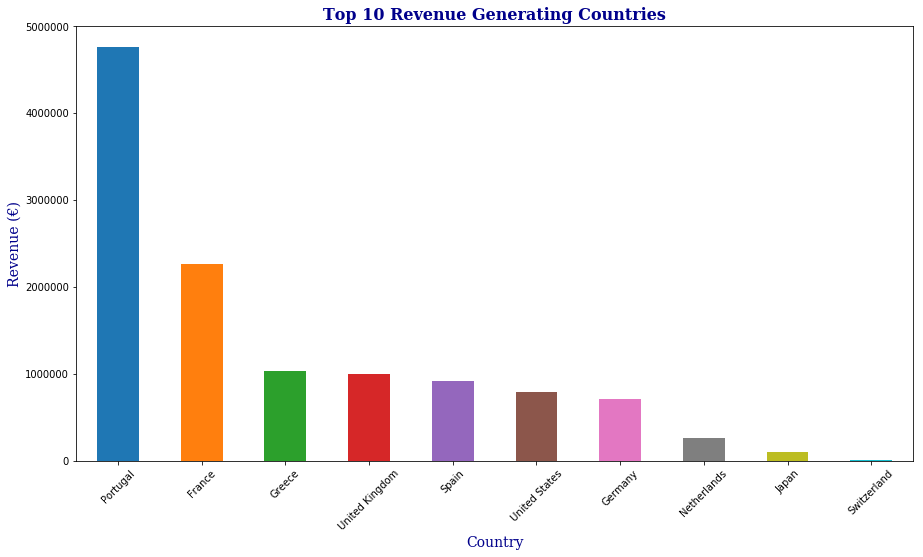

In [475]:
top_countries_by_revenue.plot.bar(x='Country', y="TotalRevEUR", figsize=(15,8), legend=None)
plt.xlabel("Country", fontdict=label_font)
plt.xticks(rotation=45)
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.title("Top 10 Revenue Generating Countries", fontdict=title_font)
plt.show()

It is apparent that around 50% of the revenue is generated by companies located in Portugal. This most likely due to the fact that two out of the top 5 most profitable customers are located in Portugal, generating a large percentage of the revenue. 

**Weyland-Yutani's revenue generations by month from 2016-2018**

Knowing how the generated revenue has changed from month to month over the years can help our boss identify in which direction the company is going. 

From the results below we can tell that the revenue decreases slightly from year to year.

In [325]:
select_sales_by_month = '''
    SELECT substr(sales.datetime, 0,8) AS Month, SUM(sales.amount_EUR) AS TotalAmount
    from sales
    WHERE substr(sales.datetime, 0,5) IS NOT '2019'
    GROUP BY substr(sales.datetime, 0,8)
'''
sales_by_month = pd.read_sql_query(select_sales_by_month, con)

In [430]:
sales_by_month.head(10)

,Month,TotalAmount
0,2016-01,"407,538.58"
1,2016-02,"391,167.47"
2,2016-03,"388,131.07"
3,2016-04,"390,535.22"
4,2016-05,"331,725.72"
5,2016-06,"346,296.69"
6,2016-07,"340,246.06"
7,2016-08,"381,003.58"
8,2016-09,"341,624.63"
9,2016-10,"353,710.71"


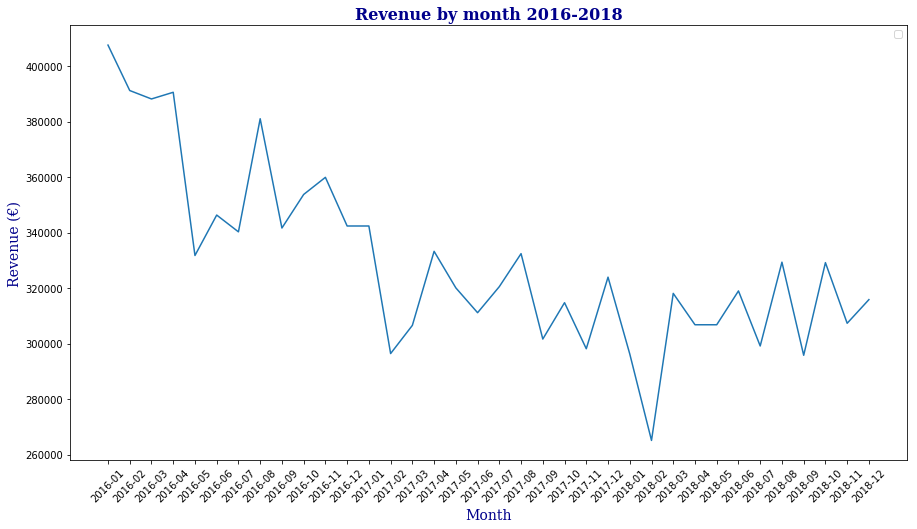

In [432]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='TotalAmount',data=sales_by_month)
plt.legend("")
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.xlabel('Month',fontdict=label_font)
plt.xticks(rotation=45)
plt.title("Revenue by month 2016-2018",fontdict=title_font)
plt.show()

From this we can see that the revenue has been slightly decreasing, and took a big hit in February 2018, but it seems that since then, the company has been keeping revenues pretty steady. 

#### Are there any clients for which profit is declining?

Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help our boss fighting customer churn.


In [456]:
profit_trends = '''
   SELECT  sum(sales.amount_EUR) AS TotalRevEUR, companies.name as Company,substr(sales.datetime, 0,8) AS Month 
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    WHERE  substr(sales.datetime, 0,5) != '2019'
    GROUP BY companies.name, substr(sales.datetime, 0,8)
    ORDER BY companies.name, substr(sales.datetime, 0,8)

'''
profit_trends = pd.read_sql_query(profit_trends, con)
profit_trends.head()

,TotalRevEUR,Company,Month
0,"2,550.36",Avaveo,2016-01
1,"1,622.27",Avaveo,2016-02
2,"2,787.10",Avaveo,2016-03
3,"3,567.56",Avaveo,2016-04
4,"2,951.22",Avaveo,2016-05


Because we have so many companies, we decided that the best way to show this on a graph was to create four subplots and have each represent a subsection of the companies, so each subplot will contain seven companies.

In [457]:
len(profit_trends['Company'].unique())/4

7.0

In [464]:
profit_trends1 = profit_trends[profit_trends['Company'].isin(profit_trends['Company'].unique()[:7])]
profit_trends2 = profit_trends[profit_trends['Company'].isin(profit_trends['Company'].unique()[7:14])]
profit_trends3 = profit_trends[profit_trends['Company'].isin(profit_trends['Company'].unique()[14:21])]
profit_trends4 = profit_trends[profit_trends['Company'].isin(profit_trends['Company'].unique()[21:])]

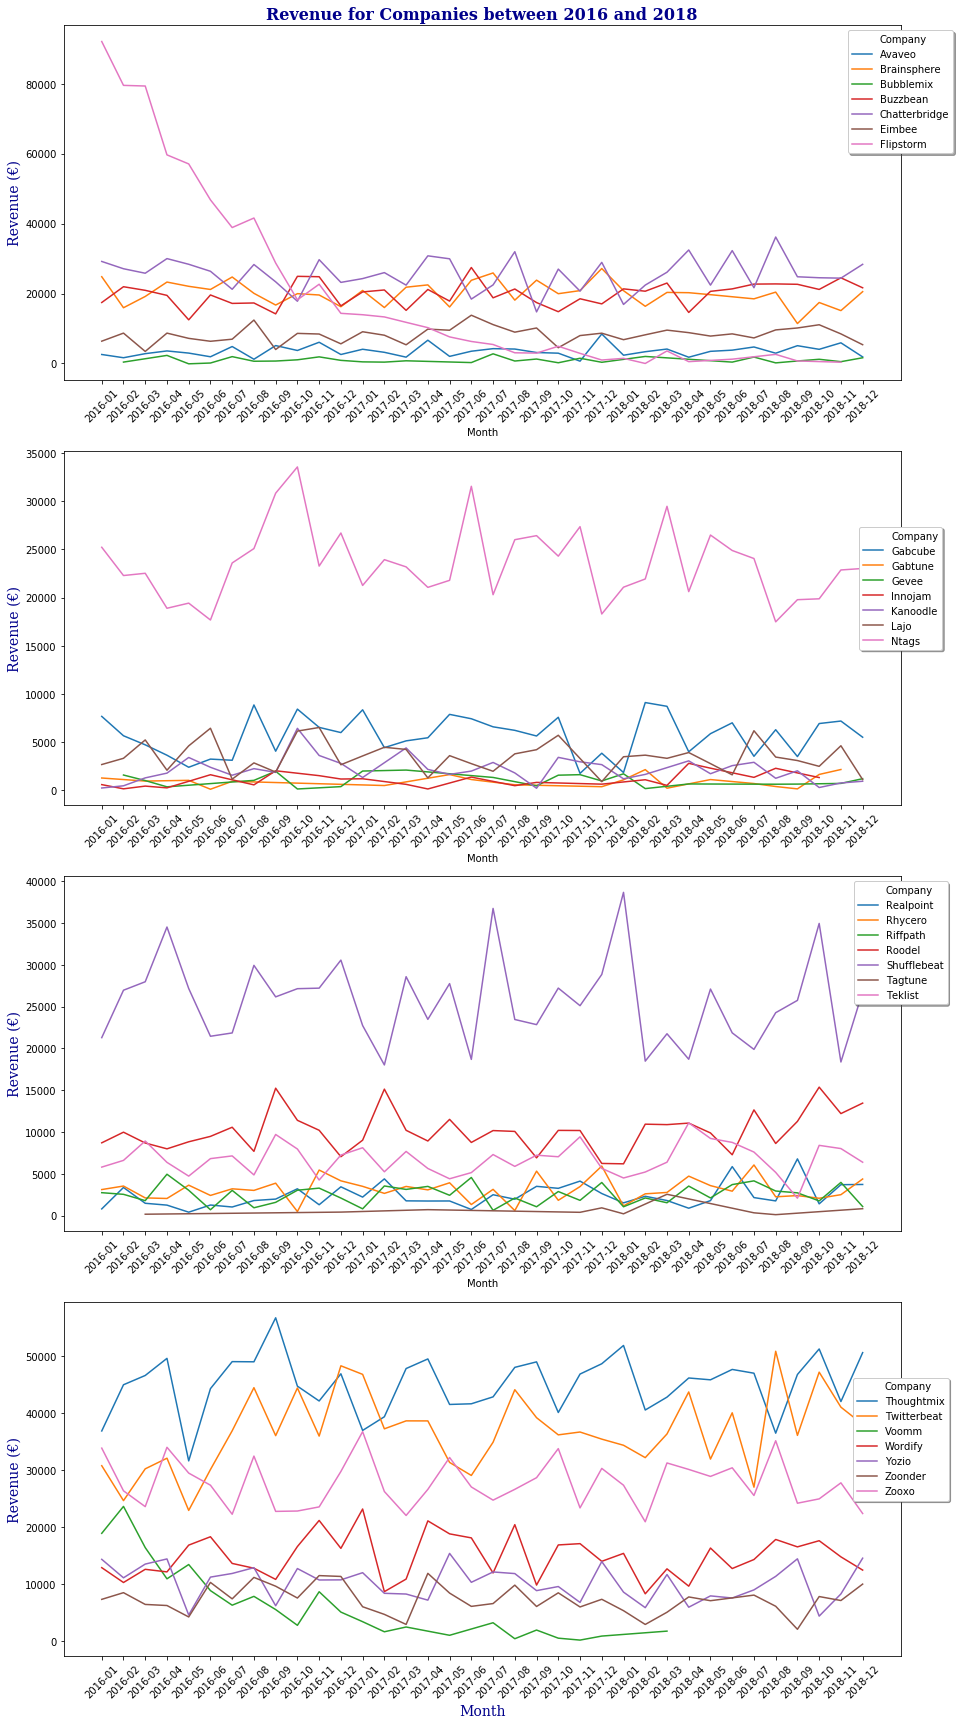

In [466]:
fig = plt.figure(figsize=(15,30))


ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412, sharex=ax4)
ax3 = fig.add_subplot(413, sharex=ax4)
ax4 = fig.add_subplot(414, sharex=ax4)



ax1.set_title("Revenue for Companies between 2016 and 2018", fontdict=title_font)


ax4.set_xlabel("Year - Month", fontdict=label_font)

sns.lineplot(data=profit_trends1, x='Month', y='TotalRevEUR', hue='Company', ax=ax1)
sns.lineplot(data=profit_trends2, x='Month', y='TotalRevEUR', hue='Company', ax=ax2)
sns.lineplot(data=profit_trends3, x='Month', y='TotalRevEUR', hue='Company', ax=ax3)
sns.lineplot(data=profit_trends4, x='Month', y='TotalRevEUR', hue='Company', ax=ax4)


ax1.set_ylabel("Revenue (€)", fontdict=label_font)
ax2.set_ylabel("Revenue (€)", fontdict=label_font)
ax3.set_ylabel("Revenue (€)", fontdict=label_font)
ax4.set_ylabel("Revenue (€)", fontdict=label_font)

ax1.legend(loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True, ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(1, 0.8),
          fancybox=True, shadow=True, ncol=1)

ax3.legend(loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True, ncol=1)

ax4.legend(loc='upper center', bbox_to_anchor=(1, 0.8),
          fancybox=True, shadow=True, ncol=1)

ax1.set_xticklabels(labels=profit_trends1['Month'],rotation=45)
ax2.set_xticklabels(labels=profit_trends1['Month'],rotation=45)
ax3.set_xticklabels(labels=profit_trends1['Month'],rotation=45)
ax4.set_xticklabels(labels=profit_trends1['Month'],rotation=45)

plt.show()

From these plots, one can see that the overall trend is declining as was mentioned before. There are two companies however, whose profit seems to be declining drastically, i.e. Flipstorm and Voom. 

In [454]:
flipstorm = '''
   SELECT *
   FROM(
   SELECT  sum(sales.amount_EUR) AS TotalRevEUR, companies.name as Company,substr(sales.datetime, 0,8) AS Month 
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    GROUP BY companies.name, substr(sales.datetime, 0,8)
    ORDER BY companies.name, substr(sales.datetime, 0,8))
    WHERE Company == 'Flipstorm'

'''
flipstorm = pd.read_sql_query(flipstorm, con)
flipstorm.head()

,TotalRevEUR,Company,Month
0,"92,093.45",Flipstorm,2016-01
1,"79,547.27",Flipstorm,2016-02
2,"79,364.67",Flipstorm,2016-03
3,"59,663.07",Flipstorm,2016-04
4,"57,073.54",Flipstorm,2016-05


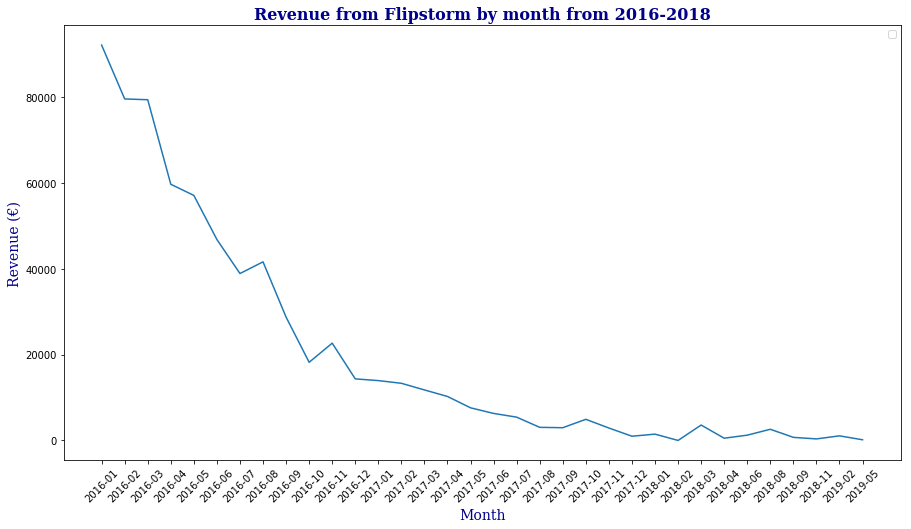

In [461]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Month',y='TotalRevEUR',data=flipstorm)
plt.legend("")
plt.ylabel('Revenue (€)', fontdict=label_font)
plt.xlabel('Month',fontdict=label_font)
plt.xticks(rotation=45)
plt.title("Revenue from Flipstorm by month from 2016-2018",fontdict=title_font)
plt.show()

We can clearly see that Flipstorm started declining very early, and is headed towards churning. 

**Is Weyland-Yutani's profit trend consistent between countries?**

This analysis could help our boss identify if there exist some troble within countries which could help identify if these countries are not being serviced as they should be. 

Seeing how the trends within countries are can help our boss identify if relations and services to some countries have to be improved. 

The below results show whether a similar trend can be found between countries

In [350]:
country_profit_trend = '''
    SELECT countries.name AS Country, SUM(sales.amount_EUR) AS TotalRevEUR, substr(sales.datetime, 0,8) as Month
    from sales
    INNER JOIN companies ON companies.id = sales.companyID
    INNER JOIN countries on countries.id = companies.countryID
    GROUP BY countries.name, substr(sales.datetime, 0,8)
    ORDER BY  countries.name,substr(sales.datetime, 0,8)
'''
country_profit_trend = pd.read_sql_query(country_profit_trend, con)
country_profit_trend.head()

,Country,TotalRevEUR,Month
0,France,"94,450.11",2016-01
1,France,"88,849.80",2016-02
2,France,"76,962.19",2016-03
3,France,"73,602.97",2016-04
4,France,"70,897.67",2016-05


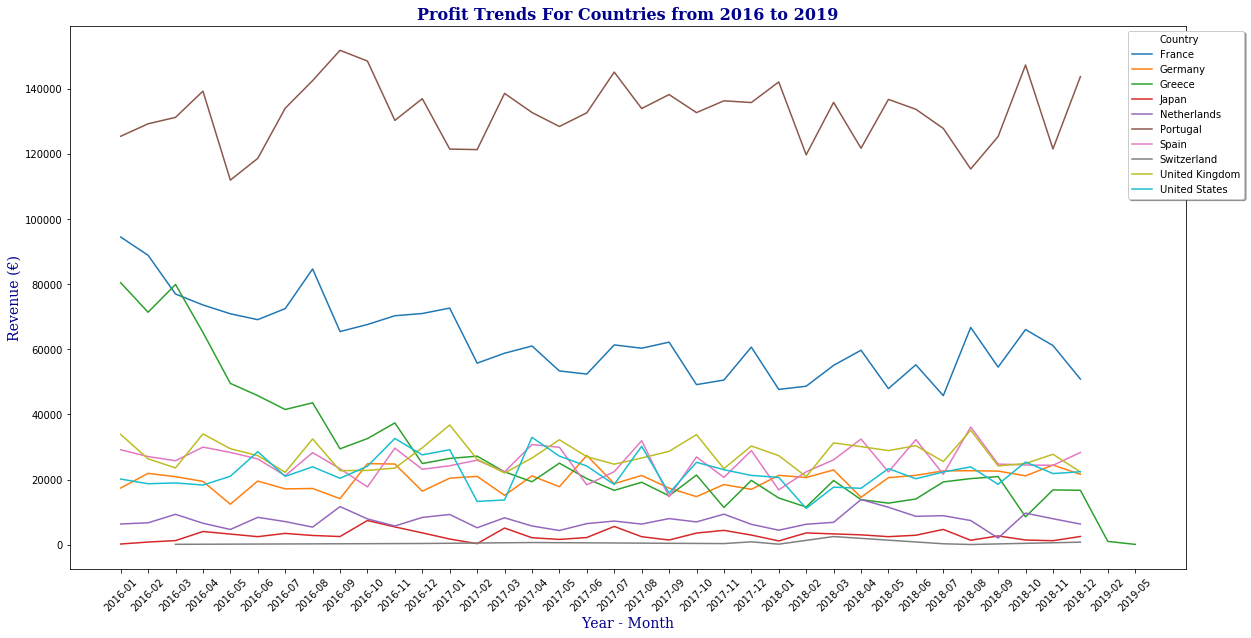

In [377]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.title('Profit Trends For Countries from 2016 to 2019', fontdict=title_font)
countrytrend = sns.lineplot(data=country_profit_trend, x='Month', y='TotalRevEUR', hue='Country')
plt.ylabel("Revenue (€)", fontdict=label_font)
plt.xlabel("Year - Month", fontdict=label_font)

plt.legend(loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True, ncol=1)


plt.show()

We can see that the profit oscillates in every location, with a slight decrease in some. Profit generated by companies located in Greece declined early on and the Greek market seems to be close to non-existant.

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

---
### Solution

John's concern is not justified as these queries are very scalable, demonstrated by the functions found below

The function below displays all transactions between Weyland-Yutani and company X, between t1 and t2. 

In [338]:
def sales(company,t1, t2):
    client_transactions = """SELECT *
   FROM(
   SELECT  sum(sales.amount_EUR) AS TotalRevEUR, companies.name as Company,substr(sales.datetime, 0,8) AS Month 
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    GROUP BY companies.name, substr(sales.datetime, 0,8)
    ORDER BY companies.name, substr(sales.datetime, 0,8))
    WHERE Company == ?
    and Month between ? and ?

    """
    client_transactions = pd.read_sql_query(client_transactions, con, params=(company,t1,t2))
    return client_transactions

The appropriate data is then fetched by:

In [339]:
sales('Flipstorm', '2016-02', '2018-02')

,TotalRevEUR,Company,Month
0,"79,547.27",Flipstorm,2016-02
1,"79,364.67",Flipstorm,2016-03
2,"59,663.07",Flipstorm,2016-04
3,"57,073.54",Flipstorm,2016-05
4,"46,791.52",Flipstorm,2016-06
5,"38,870.42",Flipstorm,2016-07
6,"41,593.49",Flipstorm,2016-08
7,"28,717.06",Flipstorm,2016-09
8,"18,190.54",Flipstorm,2016-10
9,"22,648.59",Flipstorm,2016-11


Another one of John's concerns was showing the last X sales found in the database. This is found with the function:

In [340]:
def latest(x):
    latest_transactions = """
    SELECT sales.id as transactionID, sales.amount_EUR as Price,sales.datetime as Date , companies.name
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    ORDER BY datetime DESC
    LIMIT ?
    

    """
    latest_transactions = pd.read_sql_query(latest_transactions, con, params=(x,))
    return latest_transactions

In [341]:
latest(10)

,transactionID,Price,Date,name
0,20555,139.56,2019-05-14 22:48:39,Flipstorm
1,20554,"1,051.08",2019-02-21 20:05:00,Flipstorm
2,20553,686.10,2018-12-31 21:38:02,Brainsphere
3,20552,828.37,2018-12-31 21:24:17,Thoughtmix
4,20551,606.37,2018-12-31 20:48:14,Roodel
5,20550,882.52,2018-12-31 19:56:53,Shufflebeat
6,20549,179.88,2018-12-31 18:24:51,Yozio
7,20548,"1,017.44",2018-12-31 16:46:06,Chatterbridge
8,20547,286.23,2018-12-31 16:27:34,Gabcube
9,20546,762.29,2018-12-31 14:17:24,Thoughtmix


His third scale related concern was that you could not display daily transactions for each company, which is obtained by the function below.

In [343]:
def daily():
    daily_transactions = """
   SELECT  sum(sales.amount_EUR) AS TotalRevEUR, companies.name as Company,substr(sales.datetime, 0,11) AS Date 
    FROM sales
    INNER JOIN companies ON companies.id = sales.companyID
    GROUP BY companies.name, substr(sales.datetime, 0,11)
    ORDER BY  substr(sales.datetime, 0,11), companies.name
    
   

    """
    daily_transactions = pd.read_sql_query(daily_transactions, con)
    return daily_transactions

In [345]:
daily()

,TotalRevEUR,Company,Date
0,"1,429.27",Brainsphere,2016-01-02
1,103.45,Buzzbean,2016-01-02
2,"1,556.86",Chatterbridge,2016-01-02
3,"3,994.86",Flipstorm,2016-01-02
4,505.64,Lajo,2016-01-02
5,477.71,Thoughtmix,2016-01-02
6,"1,075.82",Twitterbeat,2016-01-02
7,266.62,Voomm,2016-01-02
8,408.99,Wordify,2016-01-02
9,934.21,Zooxo,2016-01-02


From this we can see that John has nothing to worry about, because the corresponding data could easily be fetched with these functions. 

---